# NetworkX Graphs
# 2. Adjacency

[1. Neighbors](#1)

[2. Neighbors in Isomorphic Graphs](#2)

[3. Degrees](#3)

[4. Degree Histograms](#4)

[5. Adjacency Matrices](#5)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import random
import math
import numpy as np
import scipy as sp
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
from networkx.drawing.nx_agraph import to_agraph 
from pylab import hist
from IPython.display import Image
from IPython.core.display import HTML 
# from netwulf import visualize

<a id='1'></a>
## 1. Neighbors

### 1.1 Undirected Graphs

**Given an undirected graph *G = (V,E)* (where *V* denotes the set of vertices and *E* the set of edges of *G*) and a vertex *u ∈ V*, another vertex *v ∈ V* is a *neighbor* of *u* if there is an edge *(u,v) ∈ E*. The subset of *V* composed of all neighbors of node *u* is denoted as *N(u)*. If *N(u)* is empty, node *u* is called *isolated.***

### Example 1 of neighbors in undirected graphs

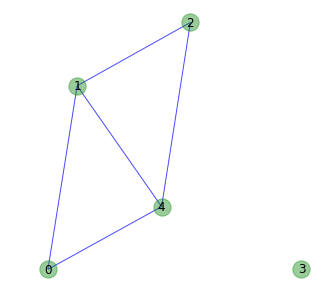

In [2]:
while True:
    G=nx.erdos_renyi_graph(5,0.3)
    if nx.triangles(G,0)==1 and len(list(nx.isolates(G)))==1:
            break

pos=graphviz_layout(G)
plt.figure(figsize=(5,5));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');

In [3]:
for n in G.nodes():
    nb=list(nx.neighbors(G,n))
    if len(nb)>0:
        print "Node %s has %i neighbors: %s" %(n,len(nb),", ".join(str(e) for e in nb))
    else:
        print "Node %s has %i neighbors: %s is an isolate" %(n,len(nb),n)

Node 0 has 2 neighbors: 1, 4
Node 1 has 3 neighbors: 0, 2, 4
Node 2 has 2 neighbors: 1, 4
Node 3 has 0 neighbors: 3 is an isolate
Node 4 has 3 neighbors: 0, 1, 2


Node 6 has 8 neighbors: 3, 4, 7, 8, 9, 10, 11, 13
Node 7 has 3 neighbors: 0, 5, 6


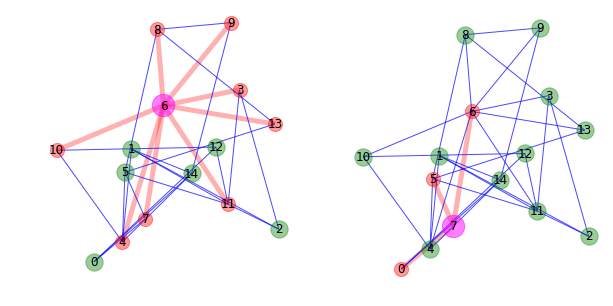

In [4]:
while True:
    G=nx.gnm_random_graph(15,30)
    if nx.is_connected(G)==True and min(dict(nx.degree(G)).values())>2:
            break

while True:            
    x1=random.choice(list(G.nodes()))
    if G.degree(x1)==max(dict(nx.degree(G)).values()):
        break
        
i1=[x1]
nb1=list(nx.neighbors(G,x1))
print "Node %s has %i neighbors: %s" %(x1,len(nb1),", ".join(str(e) for e in nb1))
o1=[y for y in G.nodes() if y not in nb1 and y!=x1]
eg1=[e for e in G.edges() if e[0]==x1 and e[1] in i1+nb1 or e[1]==x1 and e[0] in i1+nb1]
eo1=[e for e in G.edges() if e not in eg1]

while True:            
    x2=random.choice(list(G.nodes()))
    if G.degree(x2)==min(dict(nx.degree(G)).values()):
        break

i2=[x2]
nb2=list(nx.neighbors(G,x2))
print "Node %s has %i neighbors: %s" %(x2,len(nb2),", ".join(str(e) for e in nb2))
o2=[y for y in G.nodes() if y not in nb2 and y!=x2]
eg2=[e for e in G.edges() if e[0]==x2 and e[1] in i2+nb2 or e[1]==x2 and e[0] in i2+nb2]
eo2=[e for e in G.edges() if e not in eg2]

ii=[i1,i2]
nb=[nb1,nb2]
o=[o1,o2]
eg=[eg1,eg2]
eo=[eo1,eo2]
pos=nx.spring_layout(G,k=1.5) #graphviz_layout(G)

fig, ax = plt.subplots(1,2,figsize=(10,5), sharex=True)
for i in range(2):
    plt.subplot(1,2,i+1);
    nodes = nx.draw_networkx_nodes(G, pos, nodelist=ii[i],node_size=500,node_color="magenta", alpha=0.5)
    nodes = nx.draw_networkx_nodes(G, pos, nodelist=nb[i],node_size=200,node_color="r", alpha=0.4)
    nodes = nx.draw_networkx_nodes(G, pos, nodelist=o[i],node_color="g", alpha=0.4)
    nx.draw_networkx_edges(G, pos, edgelist=eg[i],width=5,edge_color="r", alpha=0.3)
    nx.draw_networkx_edges(G, pos, edgelist=eo[i],edge_color="b", alpha=0.7)
    nx.draw_networkx_labels(G, pos)
    plt.axis('off');

### Example 2 of neighbors in undirected graphs

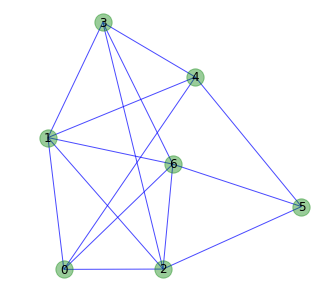

In [5]:
while True:
    n=7
    m=15
    G=nx.gnm_random_graph(n, m, directed=False)
    if nx.is_connected(G) :
      
        break
#     if nx.triangles(G,0)==1 and len(list(nx.isolates(G)))==1:
            

pos=graphviz_layout(G)
plt.figure(figsize=(5,5));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');

In [6]:
for n in G.nodes():
    nb=list(nx.neighbors(G,n))
    if len(nb)>0:
        print "Node %s has %i neighbors: %s" %(n,len(nb),", ".join(str(e) for e in nb))
    else:
        print "Node %s has %i neighbors: %s is an isolate" %(n,len(nb),n)

Node 0 has 4 neighbors: 1, 2, 4, 6
Node 1 has 5 neighbors: 0, 2, 3, 4, 6
Node 2 has 5 neighbors: 0, 1, 3, 5, 6
Node 3 has 4 neighbors: 1, 2, 4, 6
Node 4 has 4 neighbors: 0, 1, 3, 5
Node 5 has 3 neighbors: 2, 4, 6
Node 6 has 5 neighbors: 0, 1, 2, 3, 5


Node 6 has 3 neighbors: 1, 11, 4
Node 4 has 4 neighbors: 0, 9, 13, 6


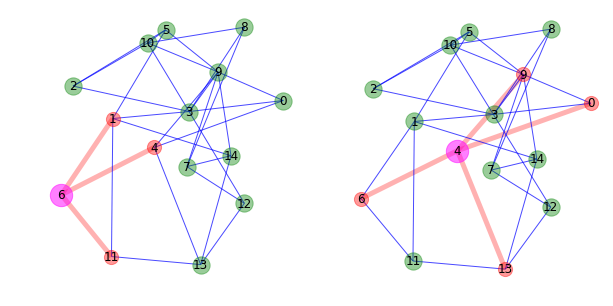

In [7]:
while True:
    G=nx.erdos_renyi_graph(15,0.2)
    if nx.is_connected(G)==True and min(dict(nx.degree(G)).values())>2:
            break

while True:            
    x1=random.choice(list(G.nodes()))
    if G.degree(x1)==max(dict(nx.degree(G)).values()):
        break
x1=6    
i1=[x1]
nb1=list(nx.neighbors(G,x1))
print "Node %s has %i neighbors: %s" %(x1,len(nb1),", ".join(str(e) for e in nb1))
o1=[y for y in G.nodes() if y not in nb1 and y!=x1]
eg1=[e for e in G.edges() if e[0]==x1 and e[1] in i1+nb1 or e[1]==x1 and e[0] in i1+nb1]
eo1=[e for e in G.edges() if e not in eg1]

while True:            
    x2=random.choice(list(G.nodes()))
    if G.degree(x2)==min(dict(nx.degree(G)).values()):
        break
x2=4
i2=[x2]
nb2=list(nx.neighbors(G,x2))
print "Node %s has %i neighbors: %s" %(x2,len(nb2),", ".join(str(e) for e in nb2))
o2=[y for y in G.nodes() if y not in nb2 and y!=x2]
eg2=[e for e in G.edges() if e[0]==x2 and e[1] in i2+nb2 or e[1]==x2 and e[0] in i2+nb2]
eo2=[e for e in G.edges() if e not in eg2]

ii=[i1,i2]
nb=[nb1,nb2]
o=[o1,o2]
eg=[eg1,eg2]
eo=[eo1,eo2]
pos=nx.spring_layout(G,k=1.5) #graphviz_layout(G)

fig, ax = plt.subplots(1,2,figsize=(10,5), sharex=True)
for i in range(2):
    plt.subplot(1,2,i+1);
    nodes = nx.draw_networkx_nodes(G, pos, nodelist=ii[i],node_size=500,node_color="magenta", alpha=0.5)
    nodes = nx.draw_networkx_nodes(G, pos, nodelist=nb[i],node_size=200,node_color="r", alpha=0.4)
    nodes = nx.draw_networkx_nodes(G, pos, nodelist=o[i],node_color="g", alpha=0.4)
    nx.draw_networkx_edges(G, pos, edgelist=eg[i],width=5,edge_color="r", alpha=0.3)
    nx.draw_networkx_edges(G, pos, edgelist=eo[i],edge_color="b", alpha=0.7)
    nx.draw_networkx_labels(G, pos)
    plt.axis('off');

### Example 3 of neighbors in undirected graphs

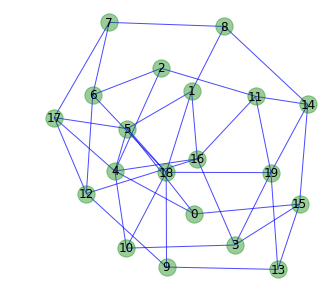

In [8]:
while True:
    G=nx.watts_strogatz_graph(20, 4, 0.8)
    if nx.triangles(G,0)==1:
            break

pos=graphviz_layout(G)
plt.figure(figsize=(5,5));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');

In [9]:
for n in G.nodes():
    nb=list(nx.neighbors(G,n))
    if len(nb)>0:
        print "Node %s has %i neighbors: %s" %(n,len(nb),", ".join(str(e) for e in nb))
    else:
        print "Node %s has %i neighbors: %s is an isolate" %(n,len(nb),n)

Node 0 has 3 neighbors: 4, 5, 15
Node 1 has 4 neighbors: 5, 8, 16, 18
Node 2 has 3 neighbors: 11, 4, 6
Node 3 has 4 neighbors: 16, 19, 10, 15
Node 4 has 6 neighbors: 0, 2, 5, 10, 16, 17
Node 5 has 5 neighbors: 0, 1, 4, 17, 18
Node 6 has 4 neighbors: 2, 12, 18, 7
Node 7 has 3 neighbors: 8, 17, 6
Node 8 has 3 neighbors: 1, 14, 7
Node 9 has 3 neighbors: 18, 12, 13
Node 10 has 3 neighbors: 3, 4, 18
Node 11 has 4 neighbors: 2, 14, 16, 19
Node 12 has 4 neighbors: 6, 9, 16, 17
Node 13 has 3 neighbors: 9, 15, 19
Node 14 has 4 neighbors: 8, 11, 15, 19
Node 15 has 4 neighbors: 0, 3, 13, 14
Node 16 has 5 neighbors: 1, 3, 4, 11, 12
Node 17 has 4 neighbors: 4, 5, 7, 12
Node 18 has 6 neighbors: 1, 5, 6, 9, 10, 19
Node 19 has 5 neighbors: 3, 11, 13, 14, 18


Node 5 has 7 neighbors: 1, 4, 9, 10, 12, 16, 17
Node 7 has 3 neighbors: 8, 17, 12


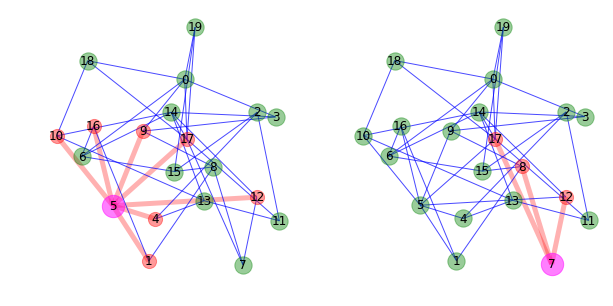

In [10]:
while True:
    G=nx.watts_strogatz_graph(20, 4, 0.8)
    if nx.is_connected(G)==True and min(dict(nx.degree(G)).values())>2:
            break

while True:            
    x1=random.choice(list(G.nodes()))
    if G.degree(x1)==max(dict(nx.degree(G)).values()):
        break
x1=5        
i1=[x1]
nb1=list(nx.neighbors(G,x1))
print "Node %s has %i neighbors: %s" %(x1,len(nb1),", ".join(str(e) for e in nb1))
o1=[y for y in G.nodes() if y not in nb1 and y!=x1]
eg1=[e for e in G.edges() if e[0]==x1 and e[1] in i1+nb1 or e[1]==x1 and e[0] in i1+nb1]
eo1=[e for e in G.edges() if e not in eg1]

while True:            
    x2=random.choice(list(G.nodes()))
    if G.degree(x2)==min(dict(nx.degree(G)).values()):
        break
x2=7
i2=[x2]
nb2=list(nx.neighbors(G,x2))
print "Node %s has %i neighbors: %s" %(x2,len(nb2),", ".join(str(e) for e in nb2))
o2=[y for y in G.nodes() if y not in nb2 and y!=x2]
eg2=[e for e in G.edges() if e[0]==x2 and e[1] in i2+nb2 or e[1]==x2 and e[0] in i2+nb2]
eo2=[e for e in G.edges() if e not in eg2]

ii=[i1,i2]
nb=[nb1,nb2]
o=[o1,o2]
eg=[eg1,eg2]
eo=[eo1,eo2]
pos=nx.spring_layout(G,k=1.5) #graphviz_layout(G)

fig, ax = plt.subplots(1,2,figsize=(10,5), sharex=True)
for i in range(2):
    plt.subplot(1,2,i+1);
    nodes = nx.draw_networkx_nodes(G, pos, nodelist=ii[i],node_size=500,node_color="magenta", alpha=0.5)
    nodes = nx.draw_networkx_nodes(G, pos, nodelist=nb[i],node_size=200,node_color="r", alpha=0.4)
    nodes = nx.draw_networkx_nodes(G, pos, nodelist=o[i],node_color="g", alpha=0.4)
    nx.draw_networkx_edges(G, pos, edgelist=eg[i],width=5,edge_color="r", alpha=0.3)
    nx.draw_networkx_edges(G, pos, edgelist=eo[i],edge_color="b", alpha=0.7)
    nx.draw_networkx_labels(G, pos)
    plt.axis('off');

### Example 4 of neighbors in undirected graphs

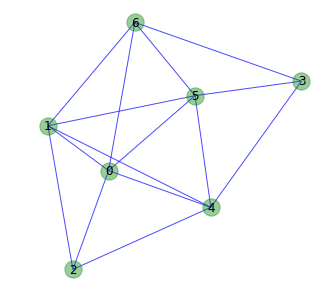

In [11]:
while True:
    n=7
    m=15
    G=nx.gnm_random_graph(n, m, directed=False)
    if nx.is_connected(G):
        break
        
#     if nx.triangles(G,0)==1 and len(list(nx.isolates(G)))==1:
        

pos=graphviz_layout(G)
plt.figure(figsize=(5,5));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');

In [12]:
for n in G.nodes():
    nb=list(nx.neighbors(G,n))
    if len(nb)>0:
        print "Node %s has %i neighbors: %s" %(n,len(nb),", ".join(str(e) for e in nb))
    else:
        print "Node %s has %i neighbors: %s is an isolate" %(n,len(nb),n)

Node 0 has 5 neighbors: 1, 2, 4, 5, 6
Node 1 has 5 neighbors: 0, 2, 4, 5, 6
Node 2 has 3 neighbors: 0, 1, 4
Node 3 has 3 neighbors: 4, 5, 6
Node 4 has 5 neighbors: 0, 1, 2, 3, 5
Node 5 has 5 neighbors: 0, 1, 3, 4, 6
Node 6 has 4 neighbors: 0, 1, 3, 5


Node 2 has 5 neighbors: 1, 10, 3, 5, 13
Node 4 has 4 neighbors: 8, 1, 12, 6


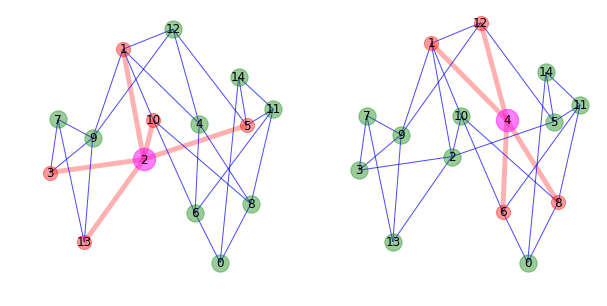

In [13]:
while True:
    G=nx.erdos_renyi_graph(15,0.2)
    if nx.is_connected(G)==True and min(dict(nx.degree(G)).values())>2:
            break

while True:            
    x1=random.choice(list(G.nodes()))
    if G.degree(x1)==max(dict(nx.degree(G)).values()):
        break
x1=2        
i1=[x1]
nb1=list(nx.neighbors(G,x1))
print "Node %s has %i neighbors: %s" %(x1,len(nb1),", ".join(str(e) for e in nb1))
o1=[y for y in G.nodes() if y not in nb1 and y!=x1]
eg1=[e for e in G.edges() if e[0]==x1 and e[1] in i1+nb1 or e[1]==x1 and e[0] in i1+nb1]
eo1=[e for e in G.edges() if e not in eg1]

while True:            
    x2=random.choice(list(G.nodes()))
    if G.degree(x2)==min(dict(nx.degree(G)).values()):
        break
x2=4
i2=[x2]
nb2=list(nx.neighbors(G,x2))
print "Node %s has %i neighbors: %s" %(x2,len(nb2),", ".join(str(e) for e in nb2))
o2=[y for y in G.nodes() if y not in nb2 and y!=x2]
eg2=[e for e in G.edges() if e[0]==x2 and e[1] in i2+nb2 or e[1]==x2 and e[0] in i2+nb2]
eo2=[e for e in G.edges() if e not in eg2]

ii=[i1,i2]
nb=[nb1,nb2]
o=[o1,o2]
eg=[eg1,eg2]
eo=[eo1,eo2]
pos=nx.spring_layout(G,k=1.5) #graphviz_layout(G)

fig, ax = plt.subplots(1,2,figsize=(10,5), sharex=True)
for i in range(2):
    plt.subplot(1,2,i+1);
    nodes = nx.draw_networkx_nodes(G, pos, nodelist=ii[i],node_size=500,node_color="magenta", alpha=0.5)
    nodes = nx.draw_networkx_nodes(G, pos, nodelist=nb[i],node_size=200,node_color="r", alpha=0.4)
    nodes = nx.draw_networkx_nodes(G, pos, nodelist=o[i],node_color="g", alpha=0.4)
    nx.draw_networkx_edges(G, pos, edgelist=eg[i],width=5,edge_color="r", alpha=0.3)
    nx.draw_networkx_edges(G, pos, edgelist=eo[i],edge_color="b", alpha=0.7)
    nx.draw_networkx_labels(G, pos)
    plt.axis('off');

### 1.2 Directed Graphs

**Given a directed graph *G = (V,E)* and a vertex *u ∈ V*, another vertex *v ∈ V* is called**

- **a *successor* or *out-going neighbor* of *u* if there is an edge *(u,v) ∈ E* and**
- **an *predecessor* or *in-coming neighbor* of *u* if there is an edge *(v,u) ∈ E*.**

**The subset of *V* composed of all successors of node *u* is denoted as *Nout(u)* and the subset of all predecessors as *Nin(u)*. If both *Nout(u)* and *Nin(u)* are empty, *u* is called *isolated.***

### Example 1 of neighbors in directed graphs

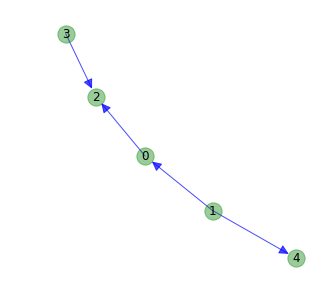

In [14]:
while True:
    G=nx.erdos_renyi_graph(5,0.3,directed=True)
    if len(list(nx.isolates(G)))==0: 
            break

pos=graphviz_layout(G)
plt.figure(figsize=(5,5));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos,arrowsize=20, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');

In [15]:
for n in G.nodes():
    nbout=list(G.successors(n))
    nbin=list(G.predecessors(n))
    if len(nbout)>0:
        print "Node %s has %i successors: %s" %(n,len(nbout),", ".join(str(e) for e in nbout))
    if len(nbin)>0:
        print "Node %s has %i predecessors: %s" %(n,len(nbin),", ".join(str(e) for e in nbin))
    if len(nbout)==0 and len(nbin)==0:
        print "Node %s has %i successors and predecessors: %s is an isolate" %(n,len(nbout)+len(nbin),n)

Node 0 has 1 successors: 2
Node 0 has 1 predecessors: 1
Node 1 has 2 successors: 0, 4
Node 2 has 2 predecessors: 0, 3
Node 3 has 1 successors: 2
Node 4 has 1 predecessors: 1


Node 1 has 5 successors: 6, 3, 5, 14, 7
Node 12 has 3 predecessors: 10, 4, 2


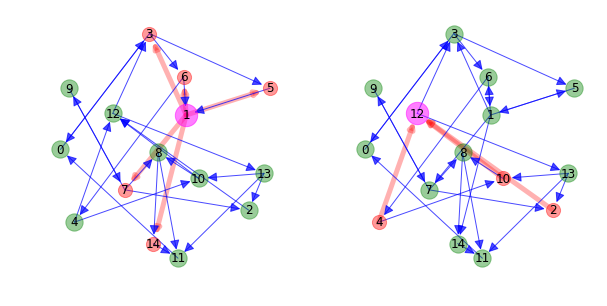

In [16]:
while True:
    G=nx.gnm_random_graph(15,30,directed=True)
    if nx.is_weakly_connected(G)==True and min(dict(G.out_degree()).values())>0 and min(dict(G.in_degree()).values())>0:
            break

while True:            
    x1=random.choice(list(G.nodes()))
    if G.out_degree(x1)==max(dict(G.out_degree()).values()):
        break
        
i1=[x1]
nb1=list(G.successors(x1))
print "Node %s has %i successors: %s" %(x1,len(nb1),", ".join(str(e) for e in nb1))
o1=[y for y in G.nodes() if y not in nb1 and y!=x1]
eg1=[e for e in G.edges() if e[0]==x1 and e[1] in i1+nb1]
eo1=[e for e in G.edges() if e not in eg1]

while True:            
    x2=random.choice(list(G.nodes()))
    if G.in_degree(x2)==max(dict(G.in_degree()).values()): #min(dict(G.out_degree()).values()):
        break

i2=[x2]
nb2=list(G.predecessors(x2))
print "Node %s has %i predecessors: %s" %(x2,len(nb2),", ".join(str(e) for e in nb2))
o2=[y for y in G.nodes() if y not in nb2 and y!=x2]
eg2=[e for e in G.edges() if e[1]==x2 and e[0] in i2+nb2]
eo2=[e for e in G.edges() if e not in eg2]

ii=[i1,i2]
nb=[nb1,nb2]
o=[o1,o2]
eg=[eg1,eg2]
eo=[eo1,eo2]
pos=nx.spring_layout(G,k=1.5) #graphviz_layout(G)

fig, ax = plt.subplots(1,2,figsize=(10,5), sharex=True)
for i in range(2):
    plt.subplot(1,2,i+1);
    nodes = nx.draw_networkx_nodes(G, pos, nodelist=ii[i],node_size=500,node_color="magenta", alpha=0.5)
    nodes = nx.draw_networkx_nodes(G, pos, nodelist=nb[i],node_size=200,node_color="r", alpha=0.4)
    nodes = nx.draw_networkx_nodes(G, pos, nodelist=o[i],node_color="g", alpha=0.4)
    nx.draw_networkx_edges(G, pos, edgelist=eg[i],width=5,edge_color="r", alpha=0.3)
    nx.draw_networkx_edges(G, pos, arrowsize=20,edgelist=eo[i],edge_color="b", alpha=0.7)
    nx.draw_networkx_labels(G, pos)
    plt.axis('off');

### Example 2 of neighbors in directed graphs

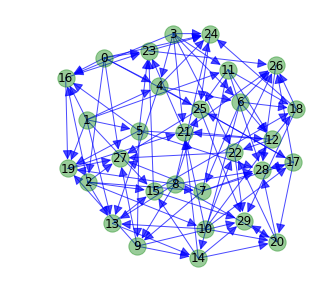

In [17]:
while True:
    G=nx.random_regular_graph(7,30)
    if len(list(nx.isolates(G)))==0: 
            break
            
E=G.edges()            
Gd=nx.DiGraph()
Gd.add_edges_from(E)

pos=graphviz_layout(Gd)
plt.figure(figsize=(5,5));
nodes = nx.draw_networkx_nodes(Gd, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(Gd, pos,arrowsize=20, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(Gd, pos)
plt.axis('off');

In [18]:
for n in Gd.nodes():
    nbout=list(Gd.successors(n))
    nbin=list(Gd.predecessors(n))
    if len(nbout)>0:
        print "Node %s has %i successors: %s" %(n,len(nbout),", ".join(str(e) for e in nbout))
    if len(nbin)>0:
        print "Node %s has %i predecessors: %s" %(n,len(nbin),", ".join(str(e) for e in nbin))
    if len(nbout)==0 and len(nbin)==0:
        print "Node %s has %i successors and predecessors: %s is an isolate" %(n,len(nbout)+len(nbin),n)

Node 0 has 7 successors: 2, 4, 16, 23, 24, 25, 27
Node 1 has 7 successors: 4, 5, 11, 13, 15, 16, 19
Node 2 has 6 successors: 7, 10, 13, 15, 16, 27
Node 2 has 1 predecessors: 0
Node 3 has 7 successors: 4, 6, 11, 16, 21, 22, 24
Node 4 has 4 successors: 24, 17, 13, 6
Node 4 has 3 predecessors: 0, 1, 3
Node 5 has 6 successors: 9, 12, 16, 19, 23, 28
Node 5 has 1 predecessors: 1
Node 6 has 5 successors: 18, 12, 26, 14, 7
Node 6 has 2 predecessors: 3, 4
Node 7 has 5 successors: 27, 9, 11, 28, 17
Node 7 has 2 predecessors: 2, 6
Node 8 has 7 successors: 9, 13, 19, 20, 24, 25, 28
Node 9 has 4 successors: 27, 19, 29, 14
Node 9 has 3 predecessors: 8, 5, 7
Node 10 has 6 successors: 12, 13, 17, 20, 21, 22
Node 10 has 1 predecessors: 2
Node 11 has 4 successors: 25, 18, 12, 28
Node 11 has 3 predecessors: 1, 3, 7
Node 12 has 3 successors: 18, 21, 22
Node 12 has 4 predecessors: 10, 11, 5, 6
Node 13 has 2 successors: 14, 15
Node 13 has 5 predecessors: 8, 1, 2, 4, 10
Node 14 has 4 successors: 29, 20, 21, 

Node 0 has 9 neighbors: 1, 2, 3, 5, 6, 8, 9, 10, 13
Node 7 has 1 neighbors: 8


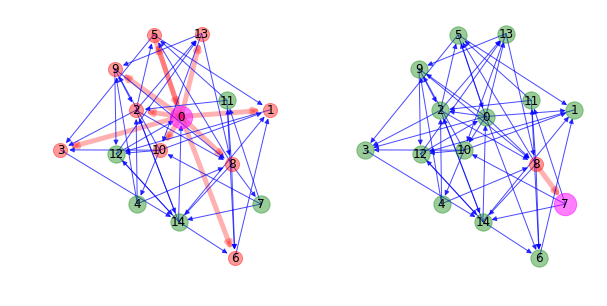

In [19]:
while True:
    G=nx.erdos_renyi_graph(15,0.2,directed=True)
    if nx.is_weakly_connected(G)==True:# and min(dict(nx.degree(G)).values())>2:
            break

while True:            
    x1=random.choice(list(G.nodes()))
    if G.degree(x1)==max(dict(nx.degree(G)).values()):
        break
# x1=6    
i1=[x1]
nb1=list(G.successors(x1))
print "Node %s has %i neighbors: %s" %(x1,len(nb1),", ".join(str(e) for e in nb1))
o1=[y for y in G.nodes() if y not in nb1 and y!=x1]
eg1=[e for e in G.edges() if e[0]==x1 and e[1] in i1+nb1 or e[1]==x1 and e[0] in i1+nb1]
eo1=[e for e in G.edges() if e not in eg1]

while True:            
    x2=random.choice(list(G.nodes()))
    if G.degree(x2)==min(dict(nx.degree(G)).values()):
        break
# x2=4
i2=[x2]
nb2=list(G.predecessors(x2))
print "Node %s has %i neighbors: %s" %(x2,len(nb2),", ".join(str(e) for e in nb2))
o2=[y for y in G.nodes() if y not in nb2 and y!=x2]
eg2=[e for e in G.edges() if e[0]==x2 and e[1] in i2+nb2 or e[1]==x2 and e[0] in i2+nb2]
eo2=[e for e in G.edges() if e not in eg2]

ii=[i1,i2]
nb=[nb1,nb2]
o=[o1,o2]
eg=[eg1,eg2]
eo=[eo1,eo2]
pos=nx.spring_layout(G,k=1.5) #graphviz_layout(G)

fig, ax = plt.subplots(1,2,figsize=(10,5), sharex=True)
for i in range(2):
    plt.subplot(1,2,i+1);
    nodes = nx.draw_networkx_nodes(G, pos, nodelist=ii[i],node_size=500,node_color="magenta", alpha=0.5)
    nodes = nx.draw_networkx_nodes(G, pos, nodelist=nb[i],node_size=200,node_color="r", alpha=0.4)
    nodes = nx.draw_networkx_nodes(G, pos, nodelist=o[i],node_color="g", alpha=0.4)
    nx.draw_networkx_edges(G, pos, edgelist=eg[i],width=5,edge_color="r", alpha=0.3)
    nx.draw_networkx_edges(G, pos, edgelist=eo[i],edge_color="b", alpha=0.7)
    nx.draw_networkx_labels(G, pos)
    plt.axis('off');

### Example 3 of neighbors in directed graphs

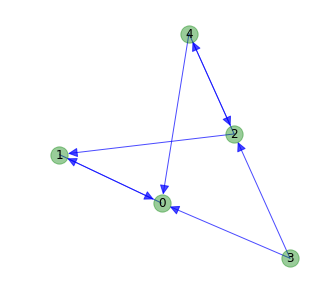

In [20]:
while True:
    G=nx.erdos_renyi_graph(5,0.3,directed=True)
    if len(list(nx.isolates(G)))==0: 
            break

pos=graphviz_layout(G)
plt.figure(figsize=(5,5));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos,arrowsize=20, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');

In [21]:
for n in G.nodes():
    nbout=list(G.successors(n))
    nbin=list(G.predecessors(n))
    if len(nbout)>0:
        print "Node %s has %i successors: %s" %(n,len(nbout),", ".join(str(e) for e in nbout))
    if len(nbin)>0:
        print "Node %s has %i predecessors: %s" %(n,len(nbin),", ".join(str(e) for e in nbin))
    if len(nbout)==0 and len(nbin)==0:
        print "Node %s has %i successors and predecessors: %s is an isolate" %(n,len(nbout)+len(nbin),n)

Node 0 has 1 successors: 1
Node 0 has 3 predecessors: 1, 3, 4
Node 1 has 1 successors: 0
Node 1 has 2 predecessors: 0, 2
Node 2 has 2 successors: 1, 4
Node 2 has 2 predecessors: 3, 4
Node 3 has 2 successors: 0, 2
Node 4 has 2 successors: 0, 2
Node 4 has 1 predecessors: 2


Node 14 has 4 successors: 9, 12, 5, 7
Node 14 has 5 predecessors: 1, 10, 3, 5, 13


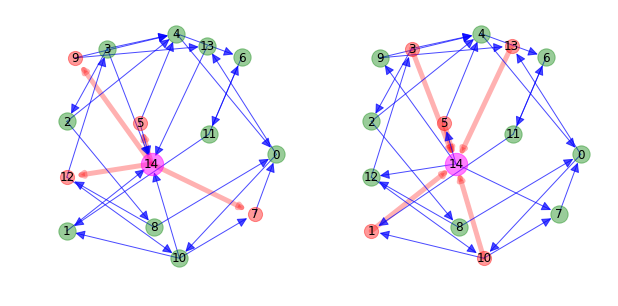

In [22]:
while True:
    G=nx.gnm_random_graph(15,30,directed=True)
    if nx.is_weakly_connected(G)==True and min(dict(G.out_degree()).values())>0 and min(dict(G.in_degree()).values())>0:
            break

while True:            
    x1=random.choice(list(G.nodes()))
    if G.out_degree(x1)==max(dict(G.out_degree()).values()):
        break
        
i1=[x1]
nb1=list(G.successors(x1))
print "Node %s has %i successors: %s" %(x1,len(nb1),", ".join(str(e) for e in nb1))
o1=[y for y in G.nodes() if y not in nb1 and y!=x1]
eg1=[e for e in G.edges() if e[0]==x1 and e[1] in i1+nb1]
eo1=[e for e in G.edges() if e not in eg1]

while True:            
    x2=random.choice(list(G.nodes()))
    if G.in_degree(x2)==max(dict(G.in_degree()).values()): #min(dict(G.out_degree()).values()):
        break

i2=[x2]
nb2=list(G.predecessors(x2))
print "Node %s has %i predecessors: %s" %(x2,len(nb2),", ".join(str(e) for e in nb2))
o2=[y for y in G.nodes() if y not in nb2 and y!=x2]
eg2=[e for e in G.edges() if e[1]==x2 and e[0] in i2+nb2]
eo2=[e for e in G.edges() if e not in eg2]

ii=[i1,i2]
nb=[nb1,nb2]
o=[o1,o2]
eg=[eg1,eg2]
eo=[eo1,eo2]
pos=nx.spring_layout(G,k=1.5) #graphviz_layout(G)

fig, ax = plt.subplots(1,2,figsize=(10,5), sharex=True)
for i in range(2):
    plt.subplot(1,2,i+1);
    nodes = nx.draw_networkx_nodes(G, pos, nodelist=ii[i],node_size=500,node_color="magenta", alpha=0.5)
    nodes = nx.draw_networkx_nodes(G, pos, nodelist=nb[i],node_size=200,node_color="r", alpha=0.4)
    nodes = nx.draw_networkx_nodes(G, pos, nodelist=o[i],node_color="g", alpha=0.4)
    nx.draw_networkx_edges(G, pos, edgelist=eg[i],width=5,edge_color="r", alpha=0.3)
    nx.draw_networkx_edges(G, pos, arrowsize=20,edgelist=eo[i],edge_color="b", alpha=0.7)
    nx.draw_networkx_labels(G, pos)
    plt.axis('off');

### Example 4 of neighbors in directed graphs

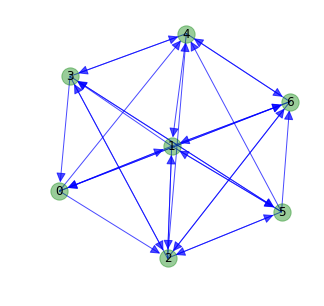

In [23]:
while True:
    G=nx.gnm_random_graph(7,30,directed=True)
    if len(list(nx.isolates(G)))==0: 
            break

pos=graphviz_layout(G)
plt.figure(figsize=(5,5));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos,arrowsize=20, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');

In [24]:
for n in G.nodes():
    nbout=list(G.successors(n))
    nbin=list(G.predecessors(n))
    if len(nbout)>0:
        print "Node %s has %i successors: %s" %(n,len(nbout),", ".join(str(e) for e in nbout))
    if len(nbin)>0:
        print "Node %s has %i predecessors: %s" %(n,len(nbin),", ".join(str(e) for e in nbin))
    if len(nbout)==0 and len(nbin)==0:
        print "Node %s has %i successors and predecessors: %s is an isolate" %(n,len(nbout)+len(nbin),n)

Node 0 has 4 successors: 1, 2, 4, 6
Node 0 has 3 predecessors: 1, 3, 6
Node 1 has 5 successors: 0, 2, 3, 5, 6
Node 1 has 5 predecessors: 0, 2, 4, 5, 6
Node 2 has 5 successors: 1, 3, 4, 5, 6
Node 2 has 5 predecessors: 0, 1, 3, 5, 6
Node 3 has 4 successors: 0, 2, 4, 5
Node 3 has 4 predecessors: 1, 2, 4, 5
Node 4 has 3 successors: 1, 3, 6
Node 4 has 5 predecessors: 0, 2, 3, 5, 6
Node 5 has 5 successors: 1, 2, 3, 4, 6
Node 5 has 3 predecessors: 1, 2, 3
Node 6 has 4 successors: 0, 1, 2, 4
Node 6 has 5 predecessors: 0, 1, 2, 4, 5


Node 5 has 3 successors: 9, 2, 3
Node 2 has 4 predecessors: 8, 10, 11, 5


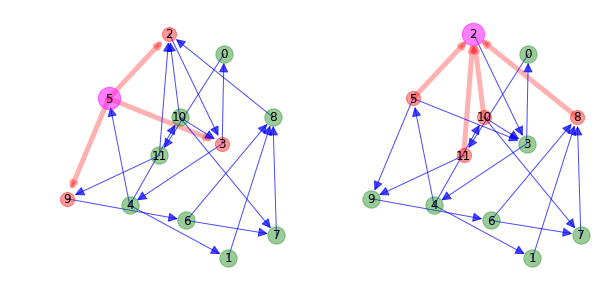

In [25]:
while True:
    G=nx.erdos_renyi_graph(12,0.1,directed=True)
    if nx.is_weakly_connected(G)==True and min(dict(G.out_degree()).values())>0 and min(dict(G.in_degree()).values())>0:
            break

while True:            
    x1=random.choice(list(G.nodes()))
    if G.out_degree(x1)==max(dict(G.out_degree()).values()):
        break
# x1=10        
i1=[x1]
nb1=list(G.successors(x1))
print "Node %s has %i successors: %s" %(x1,len(nb1),", ".join(str(e) for e in nb1))
o1=[y for y in G.nodes() if y not in nb1 and y!=x1]
eg1=[e for e in G.edges() if e[0]==x1 and e[1] in i1+nb1]
eo1=[e for e in G.edges() if e not in eg1]

while True:            
    x2=random.choice(list(G.nodes()))
    if G.in_degree(x2)==max(dict(G.in_degree()).values()): #min(dict(G.out_degree()).values()):
        break
# x2=6
i2=[x2]
nb2=list(G.predecessors(x2))
print "Node %s has %i predecessors: %s" %(x2,len(nb2),", ".join(str(e) for e in nb2))
o2=[y for y in G.nodes() if y not in nb2 and y!=x2]
eg2=[e for e in G.edges() if e[1]==x2 and e[0] in i2+nb2]
eo2=[e for e in G.edges() if e not in eg2]

ii=[i1,i2]
nb=[nb1,nb2]
o=[o1,o2]
eg=[eg1,eg2]
eo=[eo1,eo2]
pos=nx.spring_layout(G,k=1.5) #graphviz_layout(G)

fig, ax = plt.subplots(1,2,figsize=(10,5), sharex=True)
for i in range(2):
    plt.subplot(1,2,i+1);
    nodes = nx.draw_networkx_nodes(G, pos, nodelist=ii[i],node_size=500,node_color="magenta", alpha=0.5)
    nodes = nx.draw_networkx_nodes(G, pos, nodelist=nb[i],node_size=200,node_color="r", alpha=0.4)
    nodes = nx.draw_networkx_nodes(G, pos, nodelist=o[i],node_color="g", alpha=0.4)
    nx.draw_networkx_edges(G, pos, edgelist=eg[i],width=5,edge_color="r", alpha=0.3)
    nx.draw_networkx_edges(G, pos, arrowsize=20,edgelist=eo[i],edge_color="b", alpha=0.7)
    nx.draw_networkx_labels(G, pos)
    plt.axis('off');

<a id='2'></a>
## 2. Neighbors in Isomorphic Graphs

***Definition*: Two graphs *G = (V(G),E(G))* and *H = (V(H),E(H))* are said to be *isomorphic* if there exists a 1-1 and onto mapping *φ: V(G) → V(H)* such that *φ* maps edges of *G* to edges of *H*, i.e., for any *(u,v) ∈ E(G)*, it happens that *(φ(u),φ(v)) ∈ E(H)*.**

### 2.1 Undirected Graphs

### Example 1 of neighbors in isomorphic undirected graphs

The isomorphism phi maps node 0 of G to node 0 of H
The isomorphism phi maps node 1 of G to node 2 of H
The isomorphism phi maps node 2 of G to node 4 of H
The isomorphism phi maps node 3 of G to node 1 of H
The isomorphism phi maps node 4 of G to node 3 of H


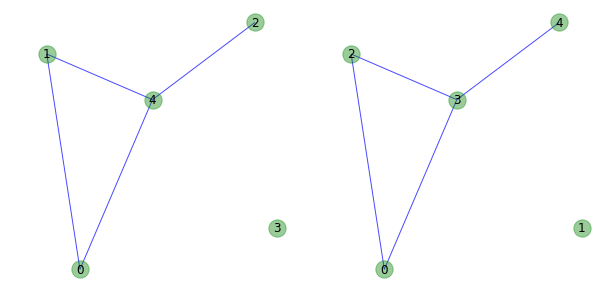

In [26]:
while True:
    G=nx.erdos_renyi_graph(5,0.3)
    if nx.triangles(G,0)==1 and len(list(nx.isolates(G)))==1:
            break
            
while True:
    H = nx.erdos_renyi_graph(5,0.3)
    if nx.is_isomorphic(H,G):
        break
        
GM = nx.algorithms.isomorphism.GraphMatcher(G,H)
GM.is_isomorphic()
phi=GM.mapping
for k,v in phi.items():
    print "The isomorphism phi maps node %s of G to node %s of H" %(k,v)

plt.figure(figsize=(10,5));
plt.subplot(121)
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.subplot(122)
pos=graphviz_layout(H)
nodes = nx.draw_networkx_nodes(H, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(H, pos, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(H, pos)
plt.axis('off');

### Example 2 of neighbors in isomorphic undirected graphs

The isomorphism phi maps node 0 of G to node 1 of H
The isomorphism phi maps node 1 of G to node 2 of H
The isomorphism phi maps node 2 of G to node 0 of H
The isomorphism phi maps node 3 of G to node 3 of H
The isomorphism phi maps node 4 of G to node 4 of H


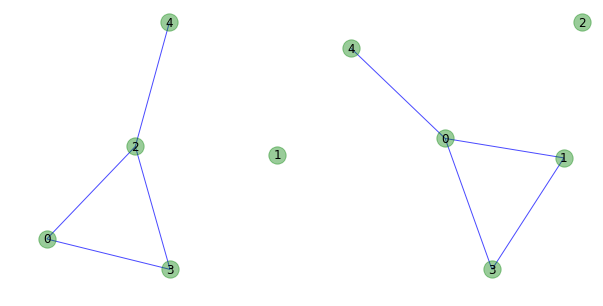

In [27]:
while True:
#     G=nx.erdos_renyi_graph(5,0.3)
    G=nx.gnm_random_graph(5, 4, directed=False)
    
    if nx.triangles(G,0)==1 and len(list(nx.isolates(G)))==1:
            break
            
while True:
    H = nx.erdos_renyi_graph(5,0.3)
    if nx.is_isomorphic(H,G):
        break
        
GM = nx.algorithms.isomorphism.GraphMatcher(G,H)
GM.is_isomorphic()
phi=GM.mapping
for k,v in phi.items():
    print "The isomorphism phi maps node %s of G to node %s of H" %(k,v)

plt.figure(figsize=(10,5));
plt.subplot(121)
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.subplot(122)
pos=graphviz_layout(H)
nodes = nx.draw_networkx_nodes(H, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(H, pos, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(H, pos)
plt.axis('off');

### Example 3 of neighbors in isomorphic undirected graphs

The isomorphism phi maps node 0 of G to node 4 of H
The isomorphism phi maps node 1 of G to node 0 of H
The isomorphism phi maps node 2 of G to node 3 of H
The isomorphism phi maps node 3 of G to node 2 of H
The isomorphism phi maps node 4 of G to node 1 of H


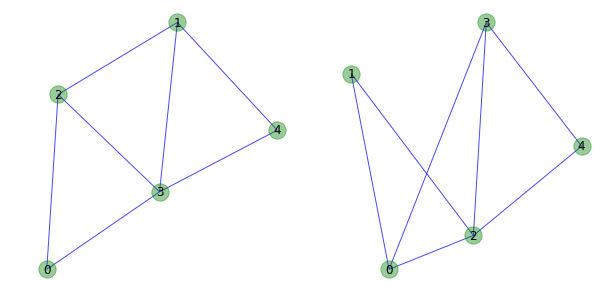

In [28]:
while True:
    G=nx.gnm_random_graph(5, 7, directed=False)
    if nx.triangles(G,0)==1:# and len(list(nx.isolates(G)))==1:
            break
            
while True:
    H = nx.erdos_renyi_graph(5,0.3)
    if nx.is_isomorphic(H,G):
        break
        
GM = nx.algorithms.isomorphism.GraphMatcher(G,H)
GM.is_isomorphic()
phi=GM.mapping
for k,v in phi.items():
    print "The isomorphism phi maps node %s of G to node %s of H" %(k,v)

plt.figure(figsize=(10,5));
plt.subplot(121)
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.subplot(122)
pos=graphviz_layout(H)
nodes = nx.draw_networkx_nodes(H, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(H, pos, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(H, pos)
plt.axis('off');

### Example 4 of neighbors in isomorphic undirected graphs

The isomorphism phi maps node 0 of G to node 2 of H
The isomorphism phi maps node 1 of G to node 3 of H
The isomorphism phi maps node 2 of G to node 0 of H
The isomorphism phi maps node 3 of G to node 4 of H
The isomorphism phi maps node 4 of G to node 1 of H
The isomorphism phi maps node 5 of G to node 5 of H


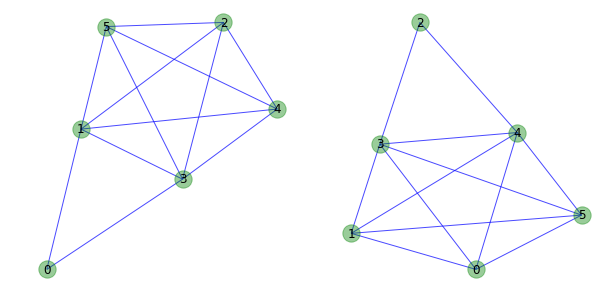

In [29]:
while True:
#     G=nx.gnm_random_graph(5, 4, directed=False)
#     G=nx.erdos_renyi_graph(5,0.3)
    G=nx.watts_strogatz_graph(6, 4, 0.7)
    if nx.triangles(G,0)==1:# and len(list(nx.isolates(G)))==1:
            break
# G=nx.watts_strogatz_graph(4, 2, 0.7)            
while True:
    H = nx.watts_strogatz_graph(6, 4, 0.7)
    if nx.is_isomorphic(H,G):
        break
        
GM = nx.algorithms.isomorphism.GraphMatcher(G,H)
GM.is_isomorphic()
phi=GM.mapping
for k,v in phi.items():
    print "The isomorphism phi maps node %s of G to node %s of H" %(k,v)

plt.figure(figsize=(10,5));
plt.subplot(121)
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.subplot(122)
pos=graphviz_layout(H)
nodes = nx.draw_networkx_nodes(H, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(H, pos, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(H, pos)
plt.axis('off');

### 2.2 Directed Graphs

### Example 1 of neighbors in isomorphic directed graphs

[(0, 3), (0, 4), (1, 0), (1, 3), (2, 1), (2, 3), (3, 0), (4, 0), (4, 2)]
[(0, 2), (1, 0), (1, 2), (2, 0), (2, 4), (3, 0), (3, 1), (4, 2), (4, 3)]
{0: 2, 1: 1, 2: 3, 3: 0, 4: 4}
The isomorphism phi maps node 0 of G to node 2 of H
The isomorphism phi maps node 1 of G to node 1 of H
The isomorphism phi maps node 2 of G to node 3 of H
The isomorphism phi maps node 3 of G to node 0 of H
The isomorphism phi maps node 4 of G to node 4 of H


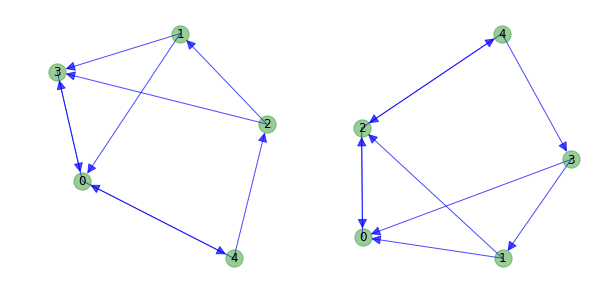

In [30]:
while True:
    G=nx.erdos_renyi_graph(5,0.3,directed=True)
    if len(list(nx.isolates(G)))==0: 
            break

while True:
    H = nx.erdos_renyi_graph(5,0.3,directed=True)
    if len(list(nx.isolates(G)))==0: 
        if nx.is_isomorphic(H,G):
            break
        
print G.edges()
print H.edges()
GM = nx.algorithms.isomorphism.DiGraphMatcher(G,H)
GM.is_isomorphic()
phi=GM.mapping
print phi
for k,v in phi.items():
    print "The isomorphism phi maps node %s of G to node %s of H" %(k,v)

plt.figure(figsize=(10,5));
plt.subplot(121)
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, arrowsize=20,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.subplot(122)
pos=graphviz_layout(H)
nodes = nx.draw_networkx_nodes(H, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(H, pos,arroesize=20, arrowsize=20,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(H, pos)
plt.axis('off');

### Example 2 of neighbors in isomorphic directed graphs

[(0, 1), (2, 0), (2, 1), (4, 3)]
[(0, 4), (2, 1), (2, 3), (3, 1)]
{0: 3, 1: 1, 2: 2, 3: 4, 4: 0}
The isomorphism phi maps node 0 of G to node 3 of H
The isomorphism phi maps node 1 of G to node 1 of H
The isomorphism phi maps node 2 of G to node 2 of H
The isomorphism phi maps node 3 of G to node 4 of H
The isomorphism phi maps node 4 of G to node 0 of H


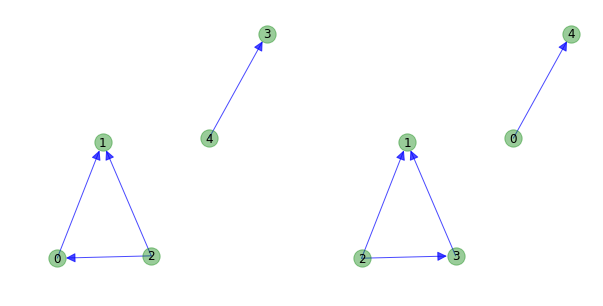

In [31]:
while True:
#     G=nx.erdos_renyi_graph(5,0.3,directed=True)
    G=nx.gnm_random_graph(5, 4, directed=True)
    
    if len(list(nx.isolates(G)))==0: 
            break

while True:
    H = nx.erdos_renyi_graph(5,0.3,directed=True)
    if len(list(nx.isolates(G)))==0: 
        if nx.is_isomorphic(H,G):
            break
        
print G.edges()
print H.edges()
GM = nx.algorithms.isomorphism.DiGraphMatcher(G,H)
GM.is_isomorphic()
phi=GM.mapping
print phi
for k,v in phi.items():
    print "The isomorphism phi maps node %s of G to node %s of H" %(k,v)

plt.figure(figsize=(10,5));
plt.subplot(121)
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, arrowsize=20,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.subplot(122)
pos=graphviz_layout(H)
nodes = nx.draw_networkx_nodes(H, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(H, pos,arroesize=20, arrowsize=20,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(H, pos)
plt.axis('off');

### Example 3 of neighbors in isomorphic directed graphs

[(0, 1), (0, 2), (0, 4), (1, 2), (2, 4), (3, 2), (4, 0), (4, 2)]
[(0, 1), (1, 3), (2, 0), (2, 1), (2, 3), (3, 1), (3, 2), (4, 1)]
{0: 2, 1: 0, 2: 1, 3: 4, 4: 3}
The isomorphism phi maps node 0 of G to node 2 of H
The isomorphism phi maps node 1 of G to node 0 of H
The isomorphism phi maps node 2 of G to node 1 of H
The isomorphism phi maps node 3 of G to node 4 of H
The isomorphism phi maps node 4 of G to node 3 of H


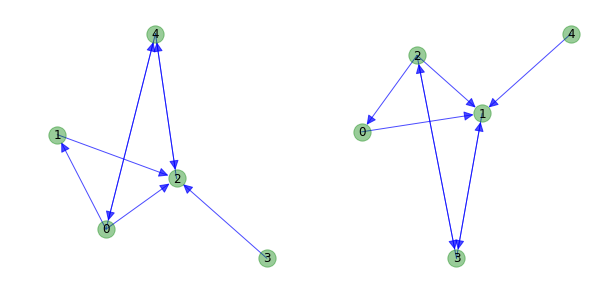

In [32]:
while True:
    G=nx.erdos_renyi_graph(5,0.3,directed=True)
    if len(list(nx.isolates(G)))==0: 
            break

while True:
    H = nx.erdos_renyi_graph(5,0.3,directed=True)
    if len(list(nx.isolates(G)))==0: 
        if nx.is_isomorphic(H,G):
            break
        
print G.edges()
print H.edges()
GM = nx.algorithms.isomorphism.DiGraphMatcher(G,H)
GM.is_isomorphic()
phi=GM.mapping
print phi
for k,v in phi.items():
    print "The isomorphism phi maps node %s of G to node %s of H" %(k,v)

plt.figure(figsize=(10,5));
plt.subplot(121)
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, arrowsize=20,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.subplot(122)
pos=graphviz_layout(H)
nodes = nx.draw_networkx_nodes(H, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(H, pos,arroesize=20, arrowsize=20,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(H, pos)
plt.axis('off');

### Example 4 of neighbors in isomorphic directed graphs

[(0, 2), (1, 2), (1, 5), (2, 5), (3, 4), (3, 5)]
[(0, 3), (0, 5), (1, 4), (1, 5), (2, 4), (4, 5)]
{0: 2, 1: 1, 2: 4, 3: 0, 4: 3, 5: 5}
The isomorphism phi maps node 0 of G to node 2 of H
The isomorphism phi maps node 1 of G to node 1 of H
The isomorphism phi maps node 2 of G to node 4 of H
The isomorphism phi maps node 3 of G to node 0 of H
The isomorphism phi maps node 4 of G to node 3 of H
The isomorphism phi maps node 5 of G to node 5 of H


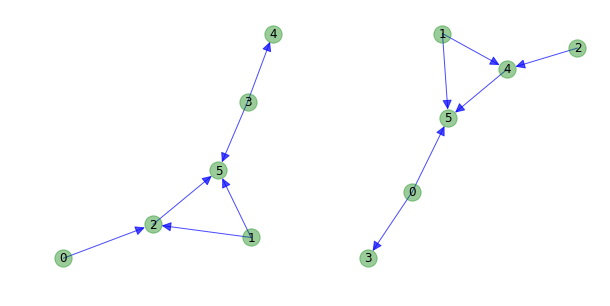

In [33]:
G=nx.watts_strogatz_graph(6, 4, 0.7)
E=G.edges()
Gd=nx.DiGraph()
Gd.add_edges_from(E)#, where E=G.edges() 
G=Gd

H=nx.watts_strogatz_graph(6, 2, 0.7)
N=random.sample(H.nodes(),len(H.nodes()))
mapping={}
for i,n in list(enumerate(H.nodes())):
    for j,m in list(enumerate(N)):
        if i==j:
            mapping[n]=m
# print mapping
H1=nx.relabel_nodes(H,mapping)
# print H.edges()
# print H1.edges()

while True:
#     G=nx.erdos_renyi_graph(5,0.3,directed=True)
#     G=nx.gnm_random_graph(5, 4, directed=True)
    G=nx.watts_strogatz_graph(6, 2, 0.7)
#     G=nx.cycle_graph(5)
    E=G.edges()
    Gd=nx.DiGraph()
    Gd.add_edges_from(E)#, where E=G.edges() 
    G=Gd
    if len(list(nx.isolates(G)))==0: 
            break

while True:
#     H = nx.erdos_renyi_graph(6,0.1,directed=True)
#     H=nx.cycle_graph(5)
#     H=nx.watts_strogatz_graph(6, 2, 0.7)
#     N=random.sample(H.nodes(),len(H.nodes()))
    H=nx.watts_strogatz_graph(6, 2, 0.7)
    N=random.sample(H.nodes(),len(H.nodes()))
    mapping={}
    for i,n in list(enumerate(H.nodes())):
        for j,m in list(enumerate(N)):
            if i==j:
                mapping[n]=m
# print mapping
    H1=nx.relabel_nodes(H,mapping)
# print H.edges()
# print H1.edges()
    E=H1.edges()
#     E=random.sample
    Hd=nx.DiGraph()
    Hd.add_edges_from(E)#, where E=G.edges() 
    H=Hd
    if len(list(nx.isolates(H)))==0: 
        if nx.is_isomorphic(H,G):
            break
        
print G.edges()
print H.edges()
GM = nx.algorithms.isomorphism.DiGraphMatcher(G,H)
GM.is_isomorphic()
phi=GM.mapping
print phi
for k,v in phi.items():
    print "The isomorphism phi maps node %s of G to node %s of H" %(k,v)

plt.figure(figsize=(10,5));
plt.subplot(121)
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, arrowsize=20,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.subplot(122)
pos=graphviz_layout(H)
nodes = nx.draw_networkx_nodes(H, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(H, pos,arroesize=20, arrowsize=20,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(H, pos)
plt.axis('off');

<a id='3'></a>
## 3. Degrees

### 3.1 Undirected Graphs

**The *degree* of a vertex of an undirected graph is equal to the number of neighbors of the vertex.**

### Example 1 of degrees of nodes of undirected graphs

In [34]:
G=nx.gnm_random_graph(15,30)

for n in G.nodes():
    print "%s has degree %i" %(n,G.degree(n))

0 has degree 6
1 has degree 4
2 has degree 7
3 has degree 3
4 has degree 3
5 has degree 5
6 has degree 7
7 has degree 2
8 has degree 4
9 has degree 6
10 has degree 2
11 has degree 3
12 has degree 3
13 has degree 2
14 has degree 3


In [35]:
m=random.choice(range(100))
M=len(G.nodes())*m/100
print "Number of randomly chosen nodes =",M
A=random.sample(G.nodes(),M)
for k,v in dict(G.degree(A)).items():
    print k,"has degree",v

Number of randomly chosen nodes = 14
0 has degree 6
1 has degree 4
2 has degree 7
3 has degree 3
4 has degree 3
5 has degree 5
6 has degree 7
7 has degree 2
8 has degree 4
9 has degree 6
10 has degree 2
12 has degree 3
13 has degree 2
14 has degree 3


In [36]:
d=dict(G.degree(G.nodes()))
sd = list(sorted(d, key=d.__getitem__, reverse=True))
for i in sd:
    print "%s has degree %i" %(i,d[i])

2 has degree 7
6 has degree 7
0 has degree 6
9 has degree 6
5 has degree 5
1 has degree 4
8 has degree 4
3 has degree 3
4 has degree 3
11 has degree 3
12 has degree 3
14 has degree 3
7 has degree 2
10 has degree 2
13 has degree 2


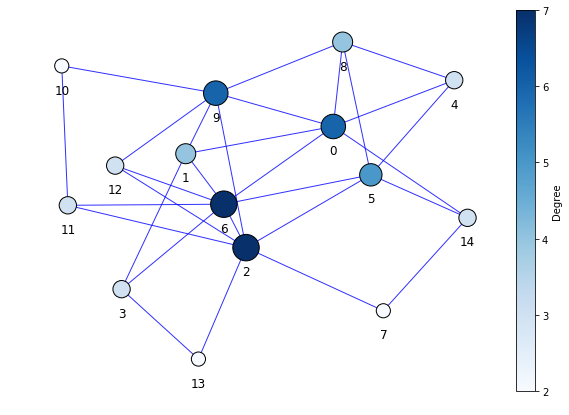

In [37]:
node_color=[G.degree(n) for n in G.nodes()]
vmin = min(node_color) #df['color'].min()
vmax = max(node_color) #df['color'].max()
cmap=plt.cm.Blues #plt.cm.coolwarm

node_list=[ G.degree(n) for n in G.nodes() ]
node_size_list=[100*n for n in node_list]

plt.figure(figsize=(10,7));
pos = graphviz_layout(G) #nx.spring_layout(G, iterations=1000) #
node_border_color='k'
nodes = nx.draw_networkx_nodes(G, pos,node_size=node_size_list, node_color=node_color, cmap=cmap, vmin=vmin, vmax=vmax)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos,edge_color='b',alpha=0.8)
plt.axis('off');
yoffset = {}
y_off =-17 #0.07  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(G, yoffset);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label='Degree') #, orientation='horizontal')
plt.margins(x=0.05, y=0.1)

### Example 2 of degrees of nodes of undirected graphs

In [38]:
G=nx.erdos_renyi_graph(20,0.2)

for n in G.nodes():
    print "%s has degree %i" %(n,G.degree(n))

0 has degree 8
1 has degree 7
2 has degree 2
3 has degree 1
4 has degree 2
5 has degree 3
6 has degree 4
7 has degree 6
8 has degree 6
9 has degree 8
10 has degree 3
11 has degree 4
12 has degree 4
13 has degree 7
14 has degree 3
15 has degree 6
16 has degree 3
17 has degree 4
18 has degree 7
19 has degree 6


In [39]:
m=random.choice(range(100))
M=len(G.nodes())*m/100
print "Number of randomly chosen nodes =",M
A=random.sample(G.nodes(),M)
for k,v in dict(G.degree(A)).items():
    print k,"has degree",v

Number of randomly chosen nodes = 15
0 has degree 8
1 has degree 7
2 has degree 2
4 has degree 2
5 has degree 3
6 has degree 4
8 has degree 6
9 has degree 8
10 has degree 3
13 has degree 7
14 has degree 3
16 has degree 3
17 has degree 4
18 has degree 7
19 has degree 6


In [40]:
d=dict(G.degree(G.nodes()))
sd = list(sorted(d, key=d.__getitem__, reverse=True))
for i in sd:
    print "%s has degree %i" %(i,d[i])

0 has degree 8
9 has degree 8
1 has degree 7
13 has degree 7
18 has degree 7
7 has degree 6
8 has degree 6
15 has degree 6
19 has degree 6
6 has degree 4
11 has degree 4
12 has degree 4
17 has degree 4
5 has degree 3
10 has degree 3
14 has degree 3
16 has degree 3
2 has degree 2
4 has degree 2
3 has degree 1


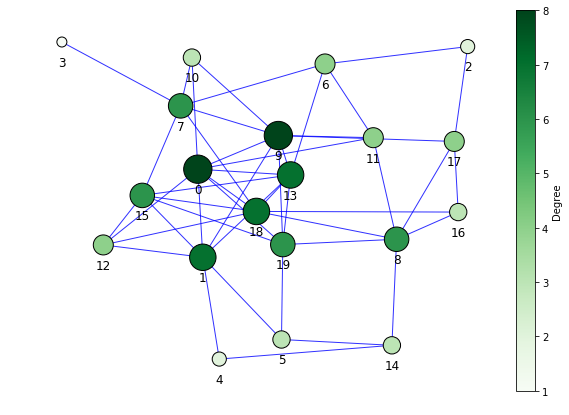

In [41]:
node_color=[G.degree(n) for n in G.nodes()]
vmin = min(node_color) #df['color'].min()
vmax = max(node_color) #df['color'].max()
cmap=plt.cm.Greens #plt.cm.coolwarm

node_list=[ G.degree(n) for n in G.nodes() ]
node_size_list=[100*n for n in node_list]

plt.figure(figsize=(10,7));
pos = graphviz_layout(G) #nx.spring_layout(G, iterations=1000) #
node_border_color='k'
nodes = nx.draw_networkx_nodes(G, pos,node_size=node_size_list, node_color=node_color, cmap=cmap, vmin=vmin, vmax=vmax)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos,edge_color='b',alpha=0.8)
plt.axis('off');
yoffset = {}
y_off =-17 #0.07  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(G, yoffset);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label='Degree') #, orientation='horizontal')
plt.margins(x=0.05, y=0.1)

### Example 3 of degrees of nodes of undirected graphs

In [42]:
n = 5 #nodes of the first set
m = n+10 #nodes of the second set
p = 0.6 #probability

import random
alls=[]
for y in range(n,n+m):
    for x in range(n):
        alls.append((x,y))
eds=random.sample(alls,int(p*len(alls)))

G=nx.Graph()
G.add_edges_from(eds)

print len(G.nodes()), len(G.edges())

for n in G.nodes():
    print "%s has degree %i" %(n,G.degree(n))

20 45
0 has degree 10
1 has degree 9
2 has degree 7
3 has degree 9
4 has degree 10
5 has degree 3
6 has degree 2
7 has degree 4
8 has degree 2
9 has degree 5
10 has degree 4
11 has degree 3
12 has degree 3
13 has degree 4
14 has degree 2
15 has degree 1
16 has degree 2
17 has degree 4
18 has degree 3
19 has degree 3


In [43]:
m=random.choice(range(100))
M=len(G.nodes())*m/100
print "Number of randomly chosen nodes =",M
A=random.sample(G.nodes(),M)
for k,v in dict(G.degree(A)).items():
    print k,"has degree",v

Number of randomly chosen nodes = 4
2 has degree 7
12 has degree 3
5 has degree 3
13 has degree 4


In [44]:
d=dict(G.degree(G.nodes()))
sd = list(sorted(d, key=d.__getitem__, reverse=True))
for i in sd:
    print "%s has degree %i" %(i,d[i])

0 has degree 10
4 has degree 10
1 has degree 9
3 has degree 9
2 has degree 7
9 has degree 5
7 has degree 4
10 has degree 4
13 has degree 4
17 has degree 4
5 has degree 3
11 has degree 3
12 has degree 3
18 has degree 3
19 has degree 3
6 has degree 2
8 has degree 2
14 has degree 2
16 has degree 2
15 has degree 1


First group of nodes: [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Second group of nodes: [0, 1, 2, 3, 4]


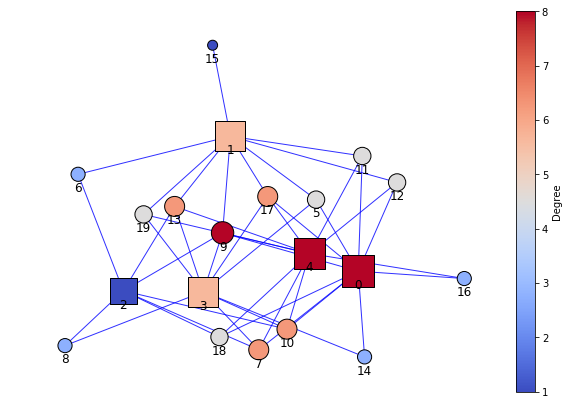

In [45]:
from networkx.algorithms import bipartite
first_group, second_group = bipartite.sets(G)
print "First group of nodes:", list(second_group)
print "Second group of nodes:", sorted(list(first_group))

node1_color=[G.degree(n) for n in G.nodes() if n in first_group]
vmin1 = min(node1_color) #df['color'].min()
vmax1 = max(node1_color) #df['color'].max()
node2_color=[G.degree(n) for n in G.nodes() if n in second_group]
vmin2 = min(node2_color) #df['color'].min()
vmax2 = max(node2_color) #df['color'].max()
cmap=plt.cm.coolwarm #plt.cm.coolwarm

node1_list=[ G.degree(n) for n in G.nodes() if n in first_group ]
node1_size_list=[100*n for n in node1_list]
node2_list=[ G.degree(n) for n in G.nodes() if n in second_group ]
node2_size_list=[100*n for n in node2_list]

plt.figure(figsize=(10,7));
pos = graphviz_layout(G) #nx.spring_layout(G, iterations=1000) #
node_border_color='k'
nodes = nx.draw_networkx_nodes(G, pos,node_size=node1_size_list, node_color=node1_color, cmap=cmap, vmin=vmin1, vmax=vmax1, nodelist=first_group, node_shape="s")
nodes.set_edgecolor(node_border_color)
nodes = nx.draw_networkx_nodes(G, pos,node_size=node2_size_list, node_color=node2_color, cmap=cmap, vmin=vmin2, vmax=vmax2, nodelist=second_group, node_shape="o")
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos,edge_color='b',alpha=0.8)
plt.axis('off');
yoffset = {}
y_off =-12 #0.07  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(G, yoffset);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label='Degree') #, orientation='horizontal')
plt.margins(x=0.05, y=0.1)

### Example 4 of degrees of nodes of undirected graphs

In [46]:
n=20 #no of nodes
m=2 #Number of edges to attach from a new node to existing nodes

G=nx.barabasi_albert_graph(n, m)

print len(G.nodes()), len(G.edges())

for n in G.nodes():
    print "%s has degree %i" %(n,G.degree(n))

20 36
0 has degree 9
1 has degree 1
2 has degree 10
3 has degree 2
4 has degree 5
5 has degree 6
6 has degree 4
7 has degree 2
8 has degree 4
9 has degree 5
10 has degree 3
11 has degree 3
12 has degree 3
13 has degree 3
14 has degree 2
15 has degree 2
16 has degree 2
17 has degree 2
18 has degree 2
19 has degree 2


In [47]:
m=random.choice(range(100))
M=len(G.nodes())*m/100
print "Number of randomly chosen nodes =",M
A=random.sample(G.nodes(),M)
for k,v in dict(G.degree(A)).items():
    print k,"has degree",v

Number of randomly chosen nodes = 10
2 has degree 10
4 has degree 5
6 has degree 4
8 has degree 4
10 has degree 3
11 has degree 3
12 has degree 3
14 has degree 2
15 has degree 2
18 has degree 2


In [48]:
d=dict(G.degree(G.nodes()))
sd = list(sorted(d, key=d.__getitem__, reverse=True))
for i in sd:
    print "%s has degree %i" %(i,d[i])

2 has degree 10
0 has degree 9
5 has degree 6
4 has degree 5
9 has degree 5
6 has degree 4
8 has degree 4
10 has degree 3
11 has degree 3
12 has degree 3
13 has degree 3
3 has degree 2
7 has degree 2
14 has degree 2
15 has degree 2
16 has degree 2
17 has degree 2
18 has degree 2
19 has degree 2
1 has degree 1


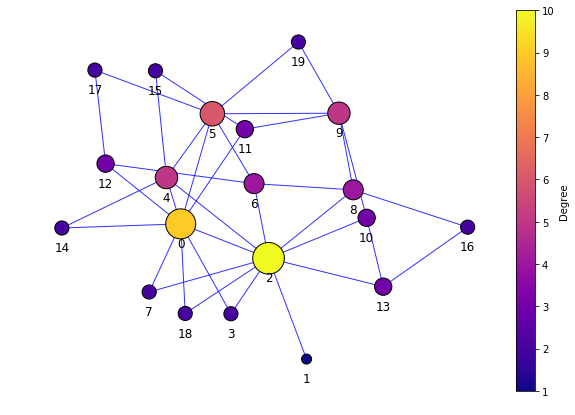

In [49]:
node_color=[G.degree(n) for n in G.nodes()]
vmin = min(node_color) #df['color'].min()
vmax = max(node_color) #df['color'].max()
cmap=plt.cm.plasma #plt.cm.coolwarm

node_list=[ G.degree(n) for n in G.nodes() ]
node_size_list=[100*n for n in node_list]

plt.figure(figsize=(10,7));
pos = graphviz_layout(G) #nx.spring_layout(G, iterations=1000) #
node_border_color='k'
nodes = nx.draw_networkx_nodes(G, pos,node_size=node_size_list, node_color=node_color, cmap=cmap, vmin=vmin, vmax=vmax)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos,edge_color='b',alpha=0.8)
plt.axis('off');
yoffset = {}
y_off =-17 #0.07  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(G, yoffset);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label='Degree') #, orientation='horizontal')
plt.margins(x=0.05, y=0.1)

### 3.2 Directed Graphs

* **The *out-degree* of a vertex of a directed graph is equal to the number of successors of the vertex.**
* **The *in-degree* of a vertex of a directed graph is equal to the number of predecessors of the vertex.**

### Example 1 of degrees of nodes of directed graphs

In [50]:
G=nx.gnm_random_graph(15,30,directed=True)

for n in G.nodes():
    print "%s has out-degree %i and in-degree %i" %(n,G.out_degree(n),G.in_degree(n))

0 has out-degree 1 and in-degree 2
1 has out-degree 2 and in-degree 3
2 has out-degree 0 and in-degree 3
3 has out-degree 0 and in-degree 2
4 has out-degree 3 and in-degree 1
5 has out-degree 3 and in-degree 1
6 has out-degree 2 and in-degree 2
7 has out-degree 5 and in-degree 3
8 has out-degree 1 and in-degree 4
9 has out-degree 2 and in-degree 1
10 has out-degree 4 and in-degree 2
11 has out-degree 2 and in-degree 1
12 has out-degree 2 and in-degree 3
13 has out-degree 2 and in-degree 1
14 has out-degree 1 and in-degree 1


In [51]:
do=dict(G.out_degree(G.nodes()))
sdo = list(sorted(do, key=do.__getitem__, reverse=True))
for i in sdo:
    print "%s has out-degree %i" %(i,do[i])

7 has out-degree 5
10 has out-degree 4
4 has out-degree 3
5 has out-degree 3
1 has out-degree 2
6 has out-degree 2
9 has out-degree 2
11 has out-degree 2
12 has out-degree 2
13 has out-degree 2
0 has out-degree 1
8 has out-degree 1
14 has out-degree 1
2 has out-degree 0
3 has out-degree 0


In [52]:
di=dict(G.in_degree(G.nodes()))
sdi = list(sorted(di, key=di.__getitem__, reverse=True))
for i in sdi:
    print "%s has in-degree %i" %(i,di[i])

8 has in-degree 4
1 has in-degree 3
2 has in-degree 3
7 has in-degree 3
12 has in-degree 3
0 has in-degree 2
3 has in-degree 2
6 has in-degree 2
10 has in-degree 2
4 has in-degree 1
5 has in-degree 1
9 has in-degree 1
11 has in-degree 1
13 has in-degree 1
14 has in-degree 1


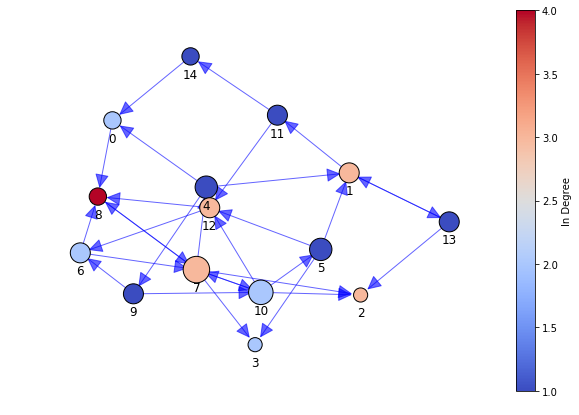

In [53]:
node_color=[G.in_degree(n) for n in G.nodes()]
vmin = min(node_color) #df['color'].min()
vmax = max(node_color) #df['color'].max()
cmap=plt.cm.coolwarm #plt.cm.Blues #

node_list=[ G.out_degree(n) for n in G.nodes() ]
node_size_list=[100*(2+n) for n in node_list] #math.log

plt.figure(figsize=(10,7));
pos = graphviz_layout(G) #nx.spring_layout(G, iterations=1000) #
node_border_color='k'
nodes = nx.draw_networkx_nodes(G, pos,node_size=node_size_list, node_color=node_color, cmap=cmap, vmin=vmin, vmax=vmax)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos,arrowsize=30,edge_color='b',alpha=0.6)
plt.axis('off');
yoffset = {}
y_off =-17 #0.07  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(G, yoffset);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label='In Degree') #, orientation='horizontal')
plt.margins(x=0.05, y=0.1)

### Example 2 of degrees of nodes of directed graphs

In [54]:
n=20 #no of nodes
k=4 #Each node is joined with its k nearest neighbors in a ring topology
p=0.7 #rewiring probability

G=nx.watts_strogatz_graph(n, k, p)

E=G.edges()
Gd=nx.DiGraph()
Gd.add_edges_from(E)
G=Gd
print len(G.nodes()), len(G.edges())

for n in G.nodes():
    print "%s has out-degree %i and in-degree %i" %(n,G.out_degree(n),G.in_degree(n))

20 40
0 has out-degree 6 and in-degree 0
1 has out-degree 3 and in-degree 1
2 has out-degree 4 and in-degree 0
3 has out-degree 3 and in-degree 2
4 has out-degree 2 and in-degree 1
5 has out-degree 3 and in-degree 0
6 has out-degree 2 and in-degree 1
7 has out-degree 3 and in-degree 1
8 has out-degree 1 and in-degree 3
9 has out-degree 1 and in-degree 1
10 has out-degree 3 and in-degree 3
11 has out-degree 2 and in-degree 2
12 has out-degree 3 and in-degree 2
13 has out-degree 2 and in-degree 4
14 has out-degree 1 and in-degree 3
15 has out-degree 1 and in-degree 2
16 has out-degree 0 and in-degree 3
17 has out-degree 0 and in-degree 4
18 has out-degree 0 and in-degree 4
19 has out-degree 0 and in-degree 3


In [55]:
do=dict(G.out_degree(G.nodes()))
sdo = list(sorted(do, key=do.__getitem__, reverse=True))
for i in sdo:
    print "%s has out-degree %i" %(i,do[i])

0 has out-degree 6
2 has out-degree 4
1 has out-degree 3
3 has out-degree 3
5 has out-degree 3
7 has out-degree 3
10 has out-degree 3
12 has out-degree 3
4 has out-degree 2
6 has out-degree 2
11 has out-degree 2
13 has out-degree 2
8 has out-degree 1
9 has out-degree 1
14 has out-degree 1
15 has out-degree 1
16 has out-degree 0
17 has out-degree 0
18 has out-degree 0
19 has out-degree 0


In [56]:
di=dict(G.in_degree(G.nodes()))
sdi = list(sorted(di, key=di.__getitem__, reverse=True))
for i in sdi:
    print "%s has in-degree %i" %(i,di[i])

13 has in-degree 4
17 has in-degree 4
18 has in-degree 4
8 has in-degree 3
10 has in-degree 3
14 has in-degree 3
16 has in-degree 3
19 has in-degree 3
3 has in-degree 2
11 has in-degree 2
12 has in-degree 2
15 has in-degree 2
1 has in-degree 1
4 has in-degree 1
6 has in-degree 1
7 has in-degree 1
9 has in-degree 1
0 has in-degree 0
2 has in-degree 0
5 has in-degree 0


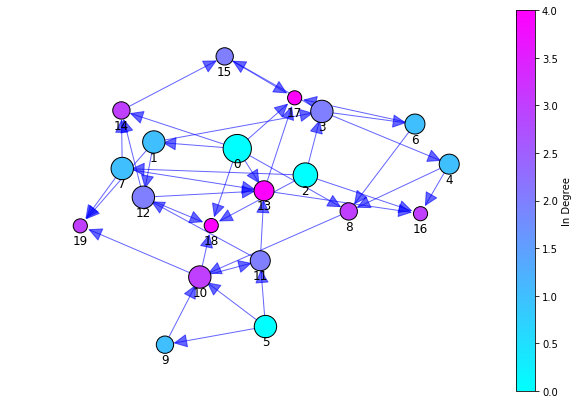

In [57]:
node_color=[G.in_degree(n) for n in G.nodes()]
vmin = min(node_color) #df['color'].min()
vmax = max(node_color) #df['color'].max()
cmap=plt.cm.cool #plt.cm.Blues #

node_list=[ G.out_degree(n) for n in G.nodes() ]
node_size_list=[100*(2+n) for n in node_list] #math.log

plt.figure(figsize=(10,7));
pos = graphviz_layout(G) #nx.spring_layout(G, iterations=1000) #
node_border_color='k'
nodes = nx.draw_networkx_nodes(G, pos,node_size=node_size_list, node_color=node_color, cmap=cmap, vmin=vmin, vmax=vmax)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos,arrowsize=30,edge_color='b',alpha=0.6)
plt.axis('off');
yoffset = {}
y_off =-17 #0.07  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(G, yoffset);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label='In Degree') #, orientation='horizontal')
plt.margins(x=0.05, y=0.1)

### Example 3 of degrees of nodes of directed graphs

In [58]:
G=nx.erdos_renyi_graph(25, 0.06, directed=True)
print len(G.nodes()), len(G.edges())

for n in G.nodes():
    print "%s has out-degree %i and in-degree %i" %(n,G.out_degree(n),G.in_degree(n))

25 33
0 has out-degree 2 and in-degree 2
1 has out-degree 1 and in-degree 2
2 has out-degree 1 and in-degree 0
3 has out-degree 0 and in-degree 0
4 has out-degree 1 and in-degree 0
5 has out-degree 2 and in-degree 2
6 has out-degree 2 and in-degree 2
7 has out-degree 2 and in-degree 0
8 has out-degree 3 and in-degree 1
9 has out-degree 1 and in-degree 3
10 has out-degree 2 and in-degree 2
11 has out-degree 0 and in-degree 2
12 has out-degree 1 and in-degree 1
13 has out-degree 0 and in-degree 3
14 has out-degree 2 and in-degree 2
15 has out-degree 0 and in-degree 1
16 has out-degree 4 and in-degree 0
17 has out-degree 3 and in-degree 2
18 has out-degree 1 and in-degree 1
19 has out-degree 0 and in-degree 1
20 has out-degree 1 and in-degree 0
21 has out-degree 2 and in-degree 0
22 has out-degree 1 and in-degree 1
23 has out-degree 1 and in-degree 2
24 has out-degree 0 and in-degree 3


In [59]:
do=dict(G.out_degree(G.nodes()))
sdo = list(sorted(do, key=do.__getitem__, reverse=True))
for i in sdo:
    print "%s has out-degree %i" %(i,do[i])

16 has out-degree 4
8 has out-degree 3
17 has out-degree 3
0 has out-degree 2
5 has out-degree 2
6 has out-degree 2
7 has out-degree 2
10 has out-degree 2
14 has out-degree 2
21 has out-degree 2
1 has out-degree 1
2 has out-degree 1
4 has out-degree 1
9 has out-degree 1
12 has out-degree 1
18 has out-degree 1
20 has out-degree 1
22 has out-degree 1
23 has out-degree 1
3 has out-degree 0
11 has out-degree 0
13 has out-degree 0
15 has out-degree 0
19 has out-degree 0
24 has out-degree 0


In [60]:
di=dict(G.in_degree(G.nodes()))
sdi = list(sorted(di, key=di.__getitem__, reverse=True))
for i in sdi:
    print "%s has in-degree %i" %(i,di[i])

9 has in-degree 3
13 has in-degree 3
24 has in-degree 3
0 has in-degree 2
1 has in-degree 2
5 has in-degree 2
6 has in-degree 2
10 has in-degree 2
11 has in-degree 2
14 has in-degree 2
17 has in-degree 2
23 has in-degree 2
8 has in-degree 1
12 has in-degree 1
15 has in-degree 1
18 has in-degree 1
19 has in-degree 1
22 has in-degree 1
2 has in-degree 0
3 has in-degree 0
4 has in-degree 0
7 has in-degree 0
16 has in-degree 0
20 has in-degree 0
21 has in-degree 0


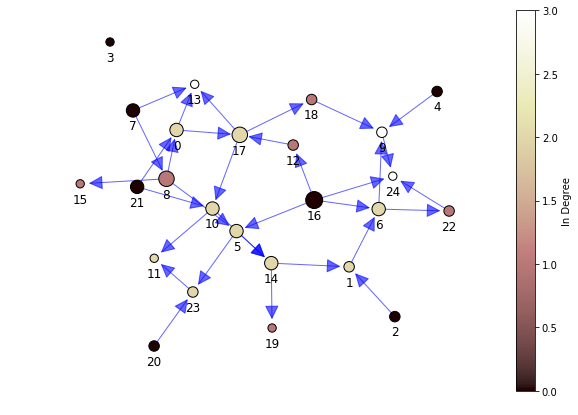

In [61]:
import math

node_color=[G.in_degree(n) for n in G.nodes()]
vmin = min(node_color) #df['color'].min()
vmax = max(node_color) #df['color'].max()
cmap=plt.cm.pink #plt.cm.Blues #

node_list=[ G.out_degree(n) for n in G.nodes() ]
node_size_list=[100*math.log(2+n**2) for n in node_list] #math.log
# node_size_list=[100*(2+n) for n in node_list] #math.log

plt.figure(figsize=(10,7));
pos = graphviz_layout(G) #nx.spring_layout(G, iterations=1000) #
node_border_color='k'
nodes = nx.draw_networkx_nodes(G, pos,node_size=node_size_list, node_color=node_color, cmap=cmap, vmin=vmin, vmax=vmax)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos,arrowsize=30,edge_color='b',alpha=0.6)
plt.axis('off');
yoffset = {}
y_off =-20 #0.07  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(G, yoffset);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label='In Degree') #, orientation='horizontal')
plt.margins(x=0.05, y=0.1)

### Example 4 of degrees of nodes of directed graphs

In [62]:
G=nx.karate_club_graph()

E=G.edges()
Gd=nx.DiGraph()
Gd.add_edges_from(E)
G=Gd
print len(G.nodes()), len(G.edges())

for n in G.nodes():
    print "%s has out-degree %i and in-degree %i" %(n,G.out_degree(n),G.in_degree(n))

34 78
0 has out-degree 16 and in-degree 0
1 has out-degree 8 and in-degree 1
2 has out-degree 8 and in-degree 2
3 has out-degree 3 and in-degree 3
4 has out-degree 2 and in-degree 1
5 has out-degree 3 and in-degree 1
6 has out-degree 1 and in-degree 3
7 has out-degree 0 and in-degree 4
8 has out-degree 3 and in-degree 2
9 has out-degree 1 and in-degree 1
10 has out-degree 0 and in-degree 3
11 has out-degree 0 and in-degree 1
12 has out-degree 0 and in-degree 2
13 has out-degree 1 and in-degree 4
14 has out-degree 2 and in-degree 0
15 has out-degree 2 and in-degree 0
16 has out-degree 0 and in-degree 2
17 has out-degree 0 and in-degree 2
18 has out-degree 2 and in-degree 0
19 has out-degree 1 and in-degree 2
20 has out-degree 2 and in-degree 0
21 has out-degree 0 and in-degree 2
22 has out-degree 2 and in-degree 0
23 has out-degree 5 and in-degree 0
24 has out-degree 3 and in-degree 0
25 has out-degree 1 and in-degree 2
26 has out-degree 2 and in-degree 0
27 has out-degree 1 and in-degr

In [63]:
do=dict(G.out_degree(G.nodes()))
sdo = list(sorted(do, key=do.__getitem__, reverse=True))
for i in sdo:
    print "%s has out-degree %i" %(i,do[i])

0 has out-degree 16
1 has out-degree 8
2 has out-degree 8
23 has out-degree 5
3 has out-degree 3
5 has out-degree 3
8 has out-degree 3
24 has out-degree 3
4 has out-degree 2
14 has out-degree 2
15 has out-degree 2
18 has out-degree 2
20 has out-degree 2
22 has out-degree 2
26 has out-degree 2
28 has out-degree 2
29 has out-degree 2
30 has out-degree 2
31 has out-degree 2
6 has out-degree 1
9 has out-degree 1
13 has out-degree 1
19 has out-degree 1
25 has out-degree 1
27 has out-degree 1
32 has out-degree 1
7 has out-degree 0
10 has out-degree 0
11 has out-degree 0
12 has out-degree 0
16 has out-degree 0
17 has out-degree 0
21 has out-degree 0
33 has out-degree 0


In [64]:
di=dict(G.in_degree(G.nodes()))
sdi = list(sorted(di, key=di.__getitem__, reverse=True))
for i in sdi:
    print "%s has in-degree %i" %(i,di[i])

33 has in-degree 17
32 has in-degree 11
7 has in-degree 4
13 has in-degree 4
31 has in-degree 4
3 has in-degree 3
6 has in-degree 3
10 has in-degree 3
27 has in-degree 3
2 has in-degree 2
8 has in-degree 2
12 has in-degree 2
16 has in-degree 2
17 has in-degree 2
19 has in-degree 2
21 has in-degree 2
25 has in-degree 2
29 has in-degree 2
30 has in-degree 2
1 has in-degree 1
4 has in-degree 1
5 has in-degree 1
9 has in-degree 1
11 has in-degree 1
28 has in-degree 1
0 has in-degree 0
14 has in-degree 0
15 has in-degree 0
18 has in-degree 0
20 has in-degree 0
22 has in-degree 0
23 has in-degree 0
24 has in-degree 0
26 has in-degree 0


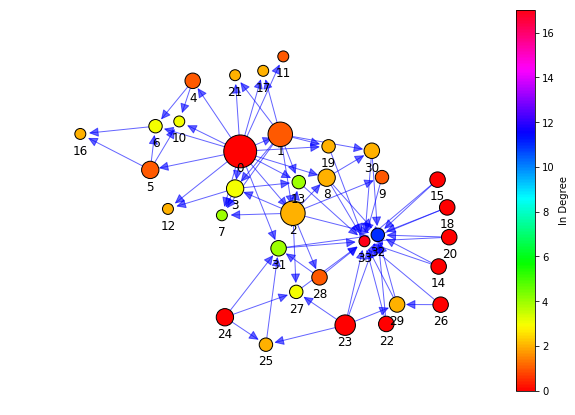

In [65]:
node_color=[G.in_degree(n) for n in G.nodes()]
vmin = min(node_color) #df['color'].min()
vmax = max(node_color) #df['color'].max()
cmap=plt.cm.hsv #plt.cm.Blues #

node_list=[ G.out_degree(n) for n in G.nodes() ]
node_size_list=[60*(2+n) for n in node_list] #math.log

plt.figure(figsize=(10,7));
pos = graphviz_layout(G) #nx.spring_layout(G, iterations=1000) #
node_border_color='k'
nodes = nx.draw_networkx_nodes(G, pos,node_size=node_size_list, node_color=node_color, cmap=cmap, vmin=vmin, vmax=vmax)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos,arrowsize=20,edge_color='b',alpha=0.6)
plt.axis('off');
yoffset = {}
y_off =-17 #0.07  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(G, yoffset);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label='In Degree') #, orientation='horizontal')
plt.margins(x=0.05, y=0.1)

<a id='4'></a>
## 4. Degree Histograms

Three ways to plot histograms:
* With "from pylab import hist" and "hist"
* With "ax = plt.subplot(111)" and "ax.hist"
* With pandas "pandas.DataFrame.hist" (not now)

### 4.1 Undirected Graphs

### Example 1 of degree histogram of Gnm random undirected graph

Degree sequence:
[6, 2, 4, 4, 5, 3, 1, 2, 5, 1, 3, 4, 4, 4, 8, 2, 4, 6, 6, 6]
Counter({4: 6, 6: 4, 2: 3, 1: 2, 3: 2, 5: 2, 8: 1}) 1 8


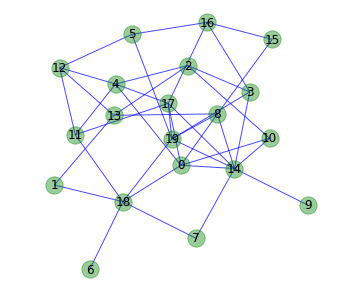

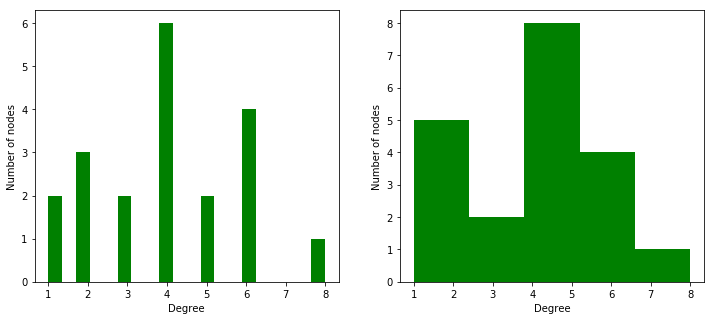

In [66]:
# Only this in the following examples

G=nx.gnm_random_graph(20,40)

ds=dict(G.degree(G.nodes())).values()
print "Degree sequence:"
print ds
print Counter(ds),min(ds),max(ds)

pos=graphviz_layout(G)
plt.figure(figsize=(5,5));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');

plt.figure(figsize=(12,5));
plt.subplot(121)
bins=len(ds)
plt.xlabel("Degree");
hist(ds,bins=bins,color='g'); 
# histtype='step',
plt.ylabel("Number of nodes");
plt.subplot(122)
bins=len(ds)/4
plt.xlabel("Degree");
hist(ds,bins=bins,color='g'); 
# histtype='step',
plt.ylabel("Number of nodes");

In [67]:
# plt.figure(figsize=(6,5));
# ax = plt.subplot(111);
# bins=len(ds)
# plt.xlabel("Degree");
# ax.hist(ds,bins=bins,color='g'); 
# # histtype='step',
# plt.ylabel("Number of nodes");

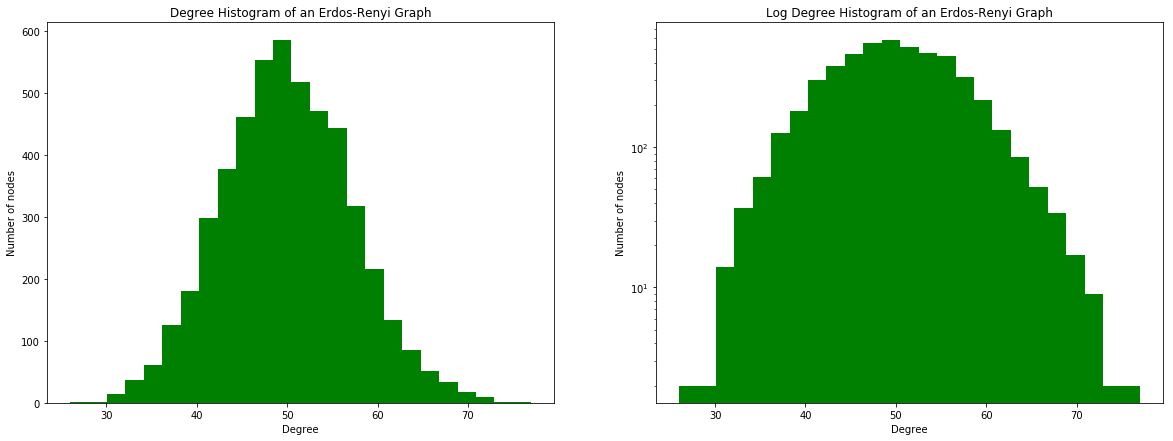

In [68]:
G = nx.erdos_renyi_graph(5000,0.01)

ds=dict(G.degree(G.nodes())).values()
bins=25

plt.figure(figsize=(20,7))
plt.subplot(121)
plt.xlabel("Degree");
hist(ds,bins=bins,color='g'); 
# histtype='step',
plt.ylabel("Number of nodes");
plt.title('Degree Histogram of an Erdos-Renyi Graph');
plt.subplot(122)
plt.xlabel("Degree");
hist(ds,bins=bins,color='g',log=True); 
# histtype='step',
plt.ylabel("Number of nodes");
plt.title('Log Degree Histogram of an Erdos-Renyi Graph');

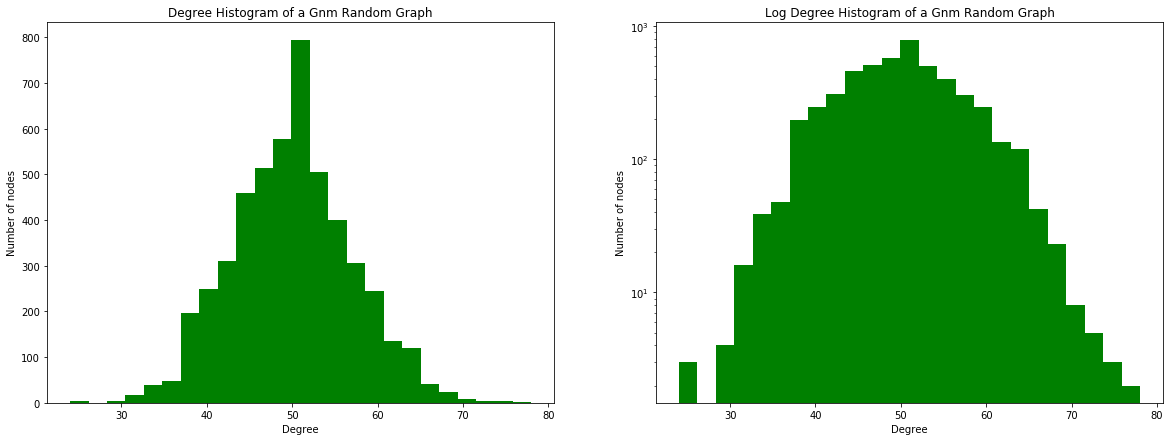

In [69]:
G = nx.gnm_random_graph(5000,125000)

ds=dict(G.degree(G.nodes())).values()
bins=25

plt.figure(figsize=(20,7))
plt.subplot(121)
plt.xlabel("Degree");
hist(ds,bins=bins,color='g'); 
# histtype='step',
plt.ylabel("Number of nodes");
plt.title('Degree Histogram of a Gnm Random Graph');
plt.subplot(122)
plt.xlabel("Degree");
hist(ds,bins=bins,color='g',log=True); 
# histtype='step',
plt.ylabel("Number of nodes");
plt.title('Log Degree Histogram of a Gnm Random Graph');

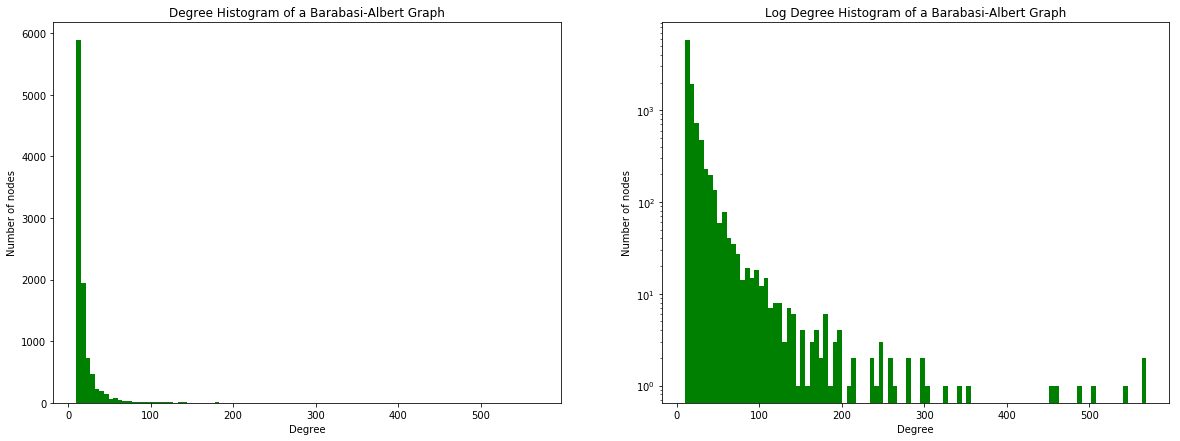

In [70]:
G = nx.barabasi_albert_graph(10000,10)

ds=dict(G.degree(G.nodes())).values()
bins=100

plt.figure(figsize=(20,7))
plt.subplot(121)
plt.xlabel("Degree");
hist(ds,bins=bins,color='g'); 
# histtype='step',
plt.ylabel("Number of nodes");
plt.title('Degree Histogram of a Barabasi-Albert Graph');
plt.subplot(122)
plt.xlabel("Degree");
hist(ds,bins=bins,color='g',log=True); 
# histtype='step',
plt.ylabel("Number of nodes");
plt.title('Log Degree Histogram of a Barabasi-Albert Graph');

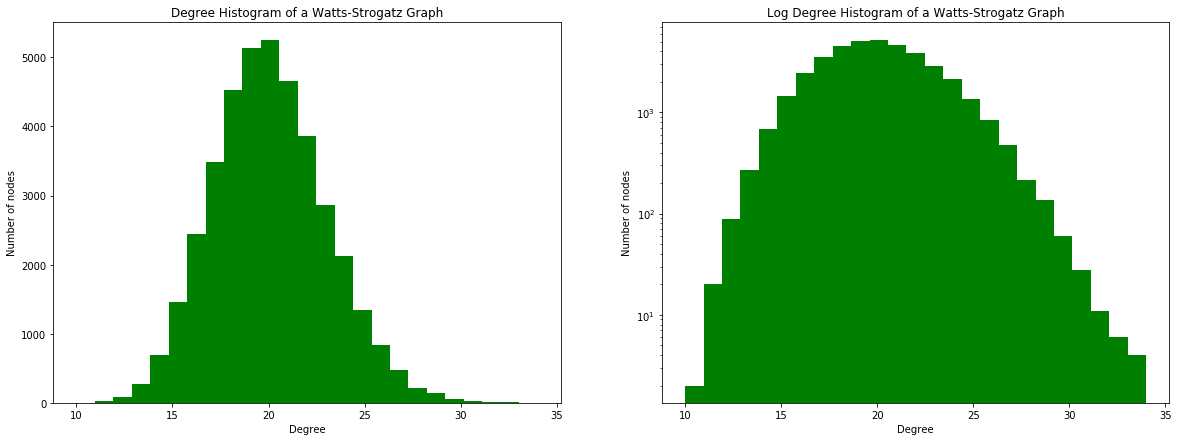

In [71]:
G = nx.watts_strogatz_graph(40000,20,0.8)

ds=dict(G.degree(G.nodes())).values()
bins=25

plt.figure(figsize=(20,7))
plt.subplot(121)
plt.xlabel("Degree");
hist(ds,bins=bins,color='g'); 
# histtype='step',
plt.ylabel("Number of nodes");
plt.title('Degree Histogram of a Watts-Strogatz Graph');
plt.subplot(122)
plt.xlabel("Degree");
hist(ds,bins=bins,color='g',log=True); 
# histtype='step',
plt.ylabel("Number of nodes");
plt.title('Log Degree Histogram of a Watts-Strogatz Graph');

### Example 2 of degree histogram of a modified undirected Regular Graph

Degree sequence:
[4, 4, 3, 7, 3, 3, 3, 5, 3, 4, 3, 3, 4, 4, 3, 3, 3, 4, 3, 5, 3, 5, 3, 3, 4, 3, 3, 3, 4, 5]
Counter({3: 17, 4: 8, 5: 4, 7: 1}) 3 7


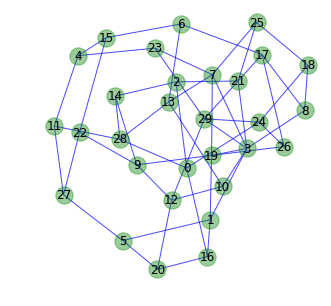

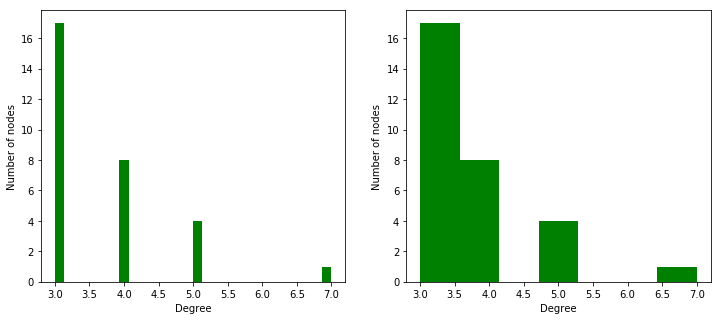

In [72]:
G=nx.random_regular_graph(3, 30)

Gc=nx.complete_graph(30)
eds=random.sample(Gc.edges(),10)
G.add_edges_from(eds)

ds=dict(G.degree(G.nodes())).values()
print "Degree sequence:"
print ds
print Counter(ds),min(ds),max(ds)

pos=graphviz_layout(G)
plt.figure(figsize=(5,5));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');

plt.figure(figsize=(12,5));
plt.subplot(121)
bins=len(ds)
plt.xlabel("Degree");
hist(ds,bins=bins,color='g'); 
# histtype='step',
plt.ylabel("Number of nodes");
plt.subplot(122)
bins=len(ds)/4
plt.xlabel("Degree");
hist(ds,bins=bins,color='g'); 
# histtype='step',
plt.ylabel("Number of nodes");

### Example 3 of degree histogram of Southern Women Bipartite Graph  

First group of nodes: ['E11', 'E10', 'E13', 'E12', 'E14', 'E9', 'E8', 'E5', 'E4', 'E7', 'E6', 'E1', 'E3', 'E2']
Second group of nodes: ['Brenda Rogers', 'Charlotte McDowd', 'Dorothy Murchison', 'Eleanor Nye', 'Evelyn Jefferson', 'Flora Price', 'Frances Anderson', 'Helen Lloyd', 'Katherina Rogers', 'Laura Mandeville', 'Myra Liddel', 'Nora Fayette', 'Olivia Carleton', 'Pearl Oglethorpe', 'Ruth DeSand', 'Sylvia Avondale', 'Theresa Anderson', 'Verne Sanderson']
Degree sequence:
[2, 8, 5, 4, 6, 3, 4, 2, 8, 4, 5, 2, 4, 4, 12, 14, 8, 4, 10, 8, 3, 4, 6, 3, 8, 3, 6, 7, 3, 4, 7, 7]
Counter({4: 8, 3: 5, 8: 5, 2: 3, 6: 3, 7: 3, 5: 2, 10: 1, 12: 1, 14: 1}) 2 14


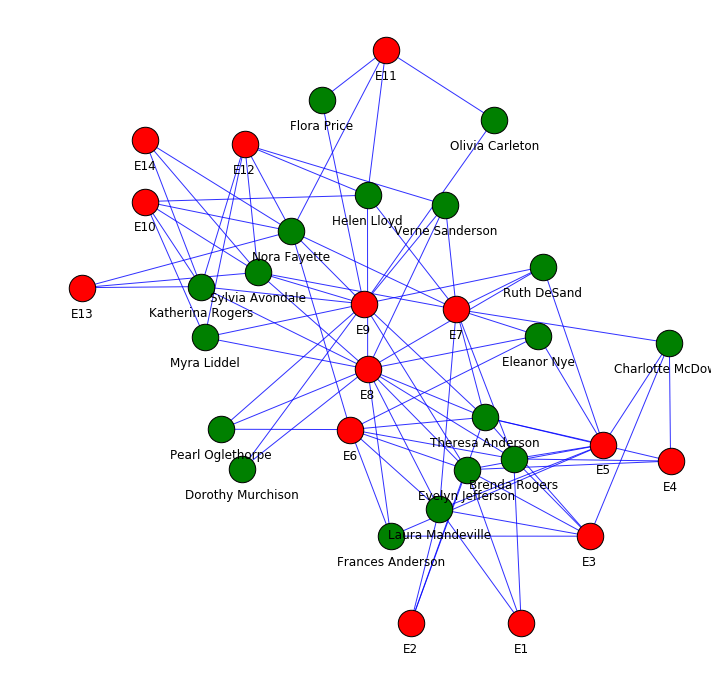

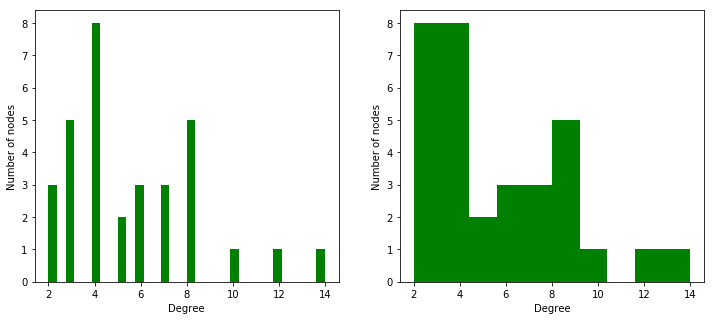

In [73]:
# Only this in the following examples

G=nx.davis_southern_women_graph()

from networkx.algorithms import bipartite
first_group, second_group = bipartite.sets(G)
print "First group of nodes:", list(second_group)
print "Second group of nodes:", sorted(list(first_group))

ds=dict(G.degree(G.nodes())).values()
print "Degree sequence:"
print ds
print Counter(ds),min(ds),max(ds)

node_size=700
pos=graphviz_layout(G)
plt.figure(figsize=(12,12));
node_border_color='k'
nodes = nx.draw_networkx_nodes(G, pos,node_color="g", nodelist=first_group, node_size=node_size)
nodes.set_edgecolor(node_border_color)
nodes = nx.draw_networkx_nodes(G, pos,nnode_color="r", nodelist=second_group, node_size=node_size)
nodes.set_edgecolor(node_border_color)
# nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos,edge_color='b',alpha=0.8)
plt.axis('off');

yoffset = {}
y_off =-14 #0.07  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(G, yoffset);

plt.figure(figsize=(12,5));
plt.subplot(121)
bins=len(ds)
plt.xlabel("Degree");
hist(ds,bins=bins,color='g'); 
# histtype='step',
plt.ylabel("Number of nodes");
plt.subplot(122)
bins=len(ds)/3
plt.xlabel("Degree");
hist(ds,bins=bins,color='g'); 
# histtype='step',
plt.ylabel("Number of nodes");

### Example 4 of degree histogram of  an undirected Strogatz-Watts  graph

Degree sequence:
[5, 3, 4, 4, 3, 3, 3, 3, 8, 5, 7, 4, 4, 4, 2, 4, 3, 5, 7, 4, 5, 3, 5, 3, 4, 2, 3, 3, 5, 2]
Counter({3: 10, 4: 8, 5: 6, 2: 3, 7: 2, 8: 1}) 2 8


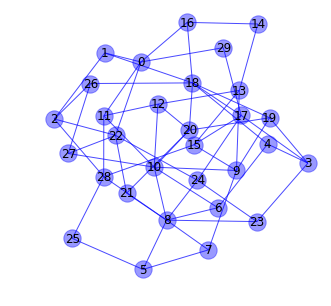

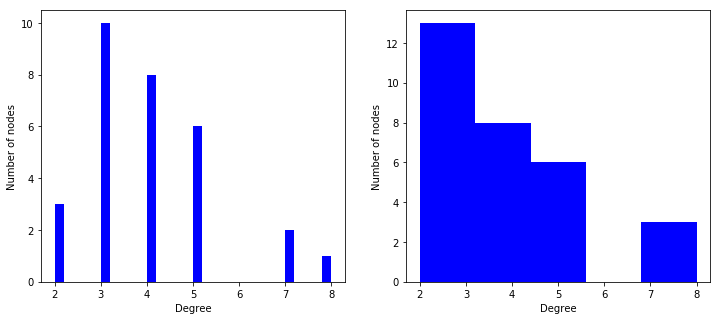

In [74]:
# Only this in the following examples

n=30 #no of nodes
k=4 #Each node is joined with its k nearest neighbors in a ring topology
p=0.65 #rewiring probability
# Undirected

G=nx.watts_strogatz_graph(n, k, p)

ds=dict(G.degree(G.nodes())).values()
print "Degree sequence:"
print ds
print Counter(ds),min(ds),max(ds)

pos=graphviz_layout(G)
plt.figure(figsize=(5,5));
nodes = nx.draw_networkx_nodes(G, pos, node_color="blue", alpha=0.4)
nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');

plt.figure(figsize=(12,5));
plt.subplot(121)
bins=len(ds)
plt.xlabel("Degree");
hist(ds,bins=bins,color='blue'); 
# histtype='step',
plt.ylabel("Number of nodes");
plt.subplot(122)
bins=len(ds)/6
plt.xlabel("Degree");
hist(ds,bins=bins,color='blue'); 
# histtype='step',
plt.ylabel("Number of nodes");

### 4.2 Directed Graphs

### Example 1 of out/in-degree histogram of a directed Gnm random graph

#### Out-Degree Histograms

Out-degree sequence:
[2, 1, 4, 4, 4, 3, 2, 1, 3, 3, 6, 7, 4, 1, 3, 2, 2, 1, 2, 2, 1, 0, 4, 3, 5]
Counter({2: 6, 1: 5, 3: 5, 4: 5, 0: 1, 5: 1, 6: 1, 7: 1}) 0 7


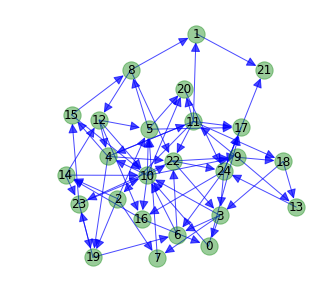

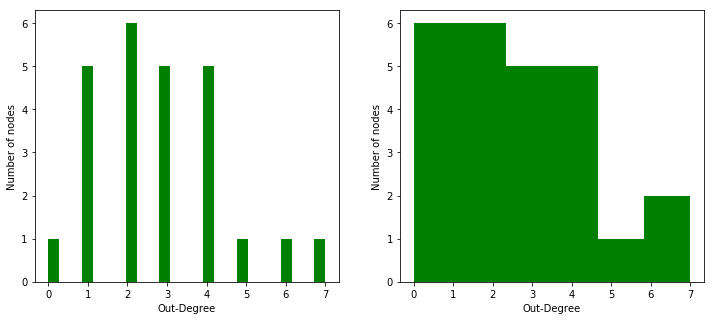

In [75]:
G=nx.gnm_random_graph(25,70,directed=True )

ds=dict(G.out_degree(G.nodes())).values()
print "Out-degree sequence:"
print ds
print Counter(ds),min(ds),max(ds)

pos=graphviz_layout(G)
plt.figure(figsize=(5,5));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos,arrowsize=20, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');

plt.figure(figsize=(12,5));
plt.subplot(121)
bins=len(ds)
plt.xlabel("Out-Degree");
hist(ds,bins=bins,color='g'); 
# histtype='step',
plt.ylabel("Number of nodes");
plt.subplot(122)
bins=len(ds)/4
plt.xlabel("Out-Degree");
hist(ds,bins=bins,color='g'); 
# histtype='step',
plt.ylabel("Number of nodes");

#### In-Degree Histograms

In-degree sequence:
[2, 2, 1, 3, 3, 4, 3, 2, 2, 2, 7, 2, 2, 2, 2, 2, 3, 4, 2, 3, 3, 2, 5, 3, 4]
Counter({2: 12, 3: 7, 4: 3, 1: 1, 5: 1, 7: 1}) 1 7


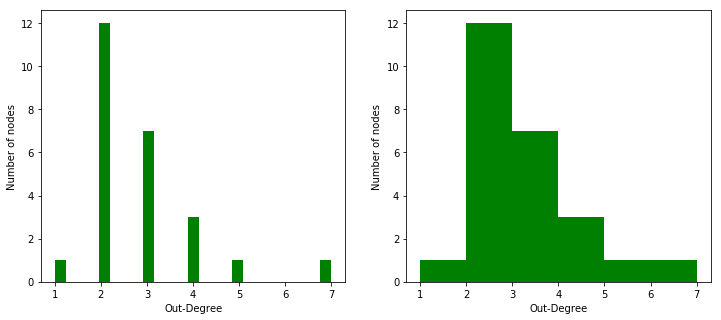

In [76]:
ds=dict(G.in_degree(G.nodes())).values()
print "In-degree sequence:"
print ds
print Counter(ds),min(ds),max(ds)

plt.figure(figsize=(12,5));
plt.subplot(121)
bins=len(ds)
plt.xlabel("Out-Degree");
hist(ds,bins=bins,color='g'); 
# histtype='step',
plt.ylabel("Number of nodes");
plt.subplot(122)
bins=len(ds)/4
plt.xlabel("Out-Degree");
hist(ds,bins=bins,color='g'); 
# histtype='step',
plt.ylabel("Number of nodes");

### Example 2 of out/in-degree histogram of a directed modified Barabasi-Albert Preferential Attachment Graph

#### Out-Degree Histograms

Out-degree sequence:
[25, 17, 25, 15, 20, 25, 20, 18, 20, 15, 16, 16, 10, 15, 11, 10, 11, 8, 9, 6, 10, 5, 3, 8, 3, 4, 5, 3, 5, 3, 1, 0, 1, 1, 0, 0, 3, 2, 2, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0]
Counter({0: 9, 1: 8, 3: 5, 5: 3, 10: 3, 15: 3, 20: 3, 25: 3, 2: 2, 8: 2, 11: 2, 16: 2, 4: 1, 6: 1, 9: 1, 17: 1, 18: 1}) 0 25


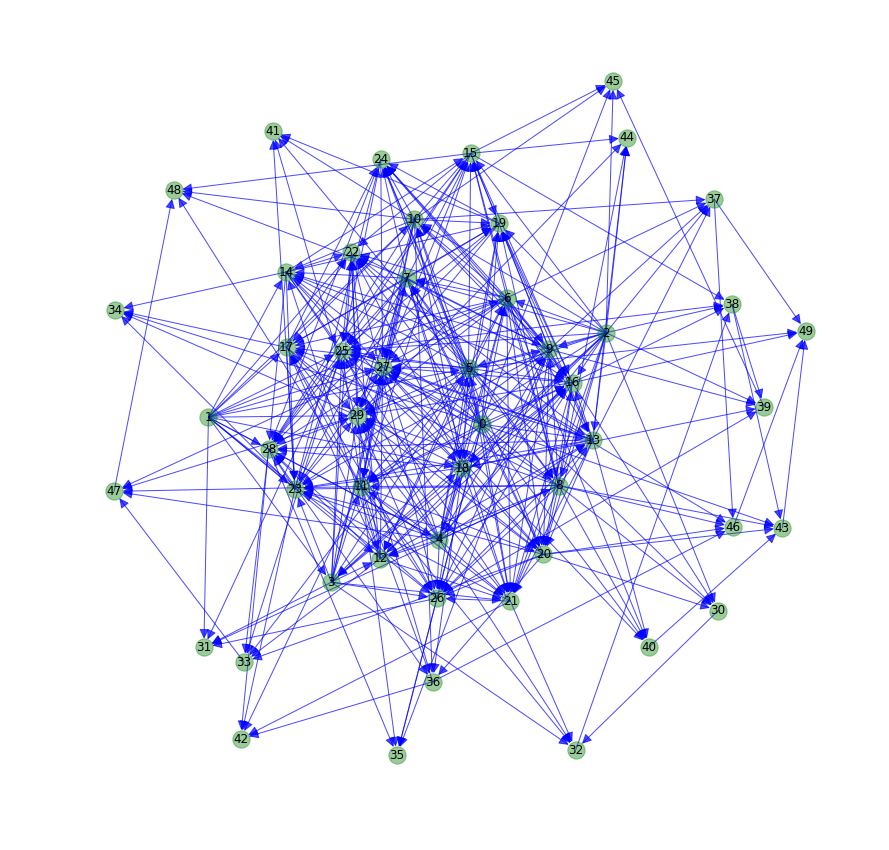

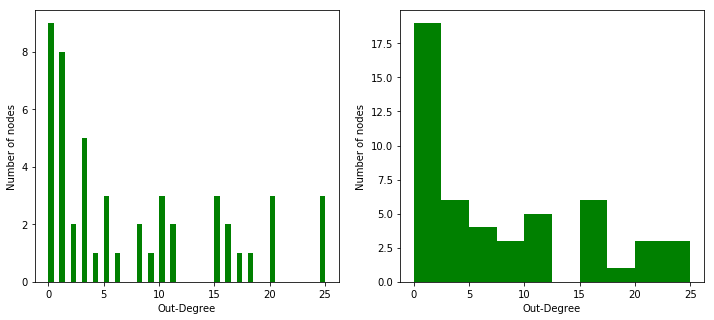

In [77]:
G=nx.barabasi_albert_graph(50,5)

Gc=nx.complete_graph(30)
eds=random.sample(Gc.edges(),200)
G.add_edges_from(eds)

E=G.edges() 
Gd=nx.DiGraph()
Gd.add_edges_from(E)
G=Gd

ds=dict(G.out_degree(G.nodes())).values()
print "Out-degree sequence:"
print ds
print Counter(ds),min(ds),max(ds)

pos=graphviz_layout(G)
plt.figure(figsize=(15,15));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos,arrowsize=20, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');

plt.figure(figsize=(12,5));
plt.subplot(121)
bins=len(ds)
plt.xlabel("Out-Degree");
hist(ds,bins=bins,color='g'); 
# histtype='step',
plt.ylabel("Number of nodes");
plt.subplot(122)
bins=len(ds)/5
plt.xlabel("Out-Degree");
hist(ds,bins=bins,color='g'); 
# histtype='step',
plt.ylabel("Number of nodes");

#### In-Degree Histograms

In-degree sequence:
[0, 0, 0, 3, 3, 5, 5, 5, 6, 7, 6, 9, 8, 8, 7, 9, 14, 10, 11, 12, 11, 15, 13, 13, 11, 17, 14, 19, 15, 20, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
Counter({5: 23, 0: 3, 11: 3, 3: 2, 6: 2, 7: 2, 8: 2, 9: 2, 13: 2, 14: 2, 15: 2, 10: 1, 12: 1, 17: 1, 19: 1, 20: 1}) 0 20


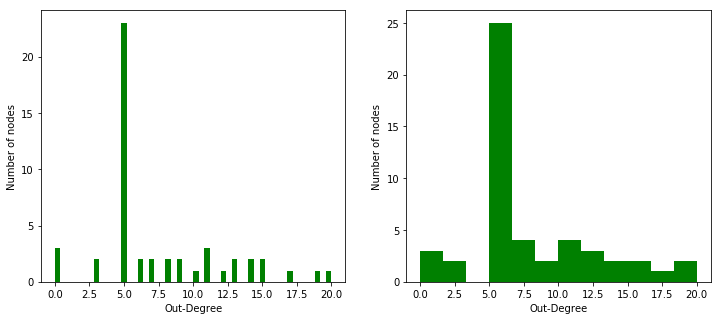

In [78]:
ds=dict(G.in_degree(G.nodes())).values()
print "In-degree sequence:"
print ds
print Counter(ds),min(ds),max(ds)

plt.figure(figsize=(12,5));
plt.subplot(121)
bins=len(ds)
plt.xlabel("Out-Degree");
hist(ds,bins=bins,color='g'); 
# histtype='step',
plt.ylabel("Number of nodes");
plt.subplot(122)
bins=len(ds)/4
plt.xlabel("Out-Degree");
hist(ds,bins=bins,color='g'); 
# histtype='step',
plt.ylabel("Number of nodes");

### Example 3 of out/in-degree histogram of a directed Random Regular Graph

#### Out-Degree Histograms

Out-degree sequence:
[21, 18, 17, 16, 15, 11, 10, 14, 11, 14, 7, 7, 12, 8, 6, 6, 10, 5, 5, 7, 7, 3, 6, 8, 4, 3, 1, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
Counter({0: 10, 7: 4, 6: 3, 1: 2, 2: 2, 3: 2, 5: 2, 8: 2, 10: 2, 11: 2, 14: 2, 4: 1, 12: 1, 15: 1, 16: 1, 17: 1, 18: 1, 21: 1}) 0 21


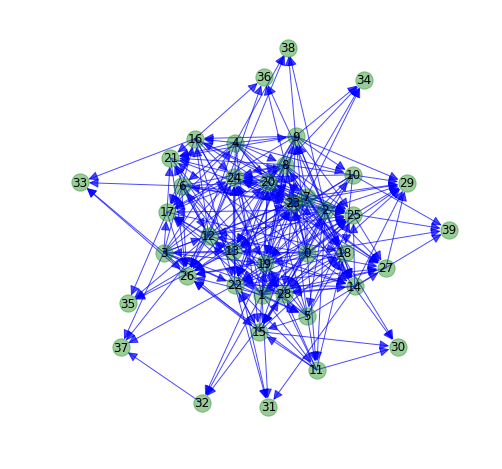

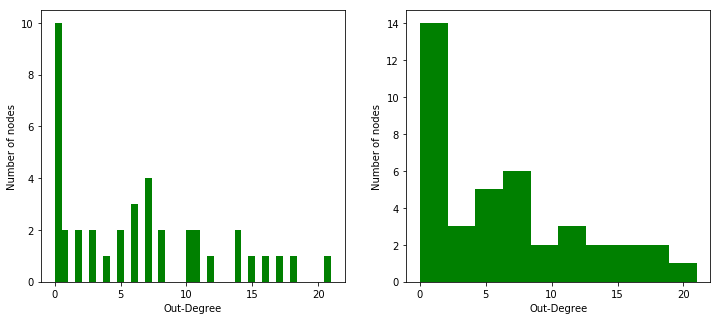

In [79]:
G=nx.random_regular_graph(4, 40)

Gc=nx.complete_graph(30)
eds=random.sample(Gc.edges(),200)
G.add_edges_from(eds)

E=G.edges() 
Gd=nx.DiGraph()
Gd.add_edges_from(E)
G=Gd

ds=dict(G.out_degree(G.nodes())).values()
print "Out-degree sequence:"
print ds
print Counter(ds),min(ds),max(ds)

pos=graphviz_layout(G)
plt.figure(figsize=(8,8));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos,arrowsize=20, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');

plt.figure(figsize=(12,5));
plt.subplot(121)
bins=len(ds)
plt.xlabel("Out-Degree");
hist(ds,bins=bins,color='g'); 
# histtype='step',
plt.ylabel("Number of nodes");
plt.subplot(122)
bins=len(ds)/4
plt.xlabel("Out-Degree");
hist(ds,bins=bins,color='g'); 
# histtype='step',
plt.ylabel("Number of nodes");

#### In-Degree Histograms

In-degree sequence:
[0, 1, 1, 1, 1, 3, 3, 4, 6, 5, 3, 4, 6, 7, 9, 9, 5, 11, 9, 11, 12, 9, 12, 10, 14, 16, 15, 9, 12, 10, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4]
Counter({4: 11, 9: 5, 1: 4, 3: 4, 12: 3, 5: 2, 6: 2, 10: 2, 11: 2, 0: 1, 7: 1, 14: 1, 15: 1, 16: 1}) 0 16


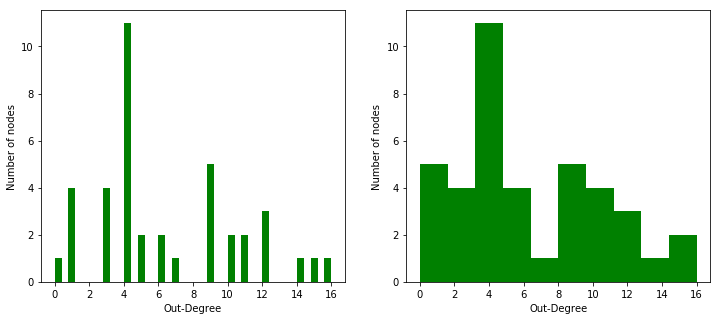

In [80]:
ds=dict(G.in_degree(G.nodes())).values()
print "In-degree sequence:"
print ds
print Counter(ds),min(ds),max(ds)

plt.figure(figsize=(12,5));
plt.subplot(121)
bins=len(ds)
plt.xlabel("Out-Degree");
hist(ds,bins=bins,color='g'); 
# histtype='step',
plt.ylabel("Number of nodes");
plt.subplot(122)
bins=len(ds)/4
plt.xlabel("Out-Degree");
hist(ds,bins=bins,color='g'); 
# histtype='step',
plt.ylabel("Number of nodes");

### Example 4 of out/in-degree histogram of a directed   Random Tree 

#### Out-Degree Histograms

30 55
Out-degree sequence:
[2, 4, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 4, 3, 1, 1, 1, 2, 1, 1, 2, 0, 4, 2, 1, 2, 4, 1, 3]
Counter({1: 13, 2: 10, 4: 4, 3: 2, 0: 1}) 0 4


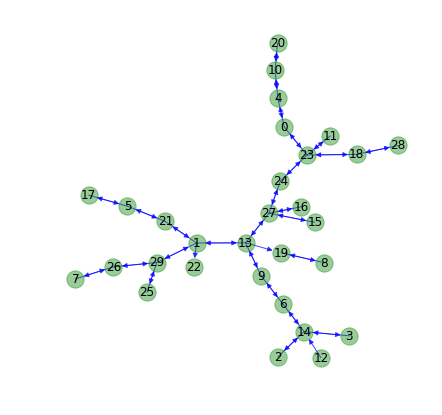

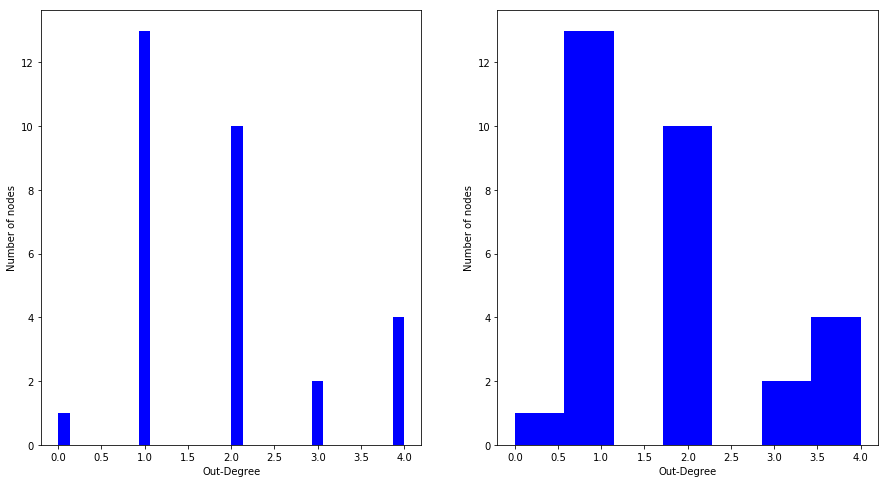

In [81]:
G=nx.random_tree(30)
E=G.edges()
Gd=nx.DiGraph()
Gd.add_edges_from(E)
G=Gd
# print len(G.edges())
e=random.sample(G.edges(),26)
eds=[]
for f in e :
    if (f[0],f[1])  in G.edges():
        eds.append((f[1],f[0]))
G.add_edges_from(eds)
print len(G.nodes()), len(G.edges())

ds=dict(G.out_degree(G.nodes())).values()
print "Out-degree sequence:"
print ds
print Counter(ds),min(ds),max(ds)

pos=graphviz_layout(G)
plt.figure(figsize=(7,7));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos,arrowsize=10, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');

plt.figure(figsize=(15,8));
plt.subplot(121)
bins=len(ds)
plt.xlabel("Out-Degree");
hist(ds,bins=bins,color='blue'); 
# histtype='step',
plt.ylabel("Number of nodes");
plt.subplot(122)
bins=len(ds)/4
plt.xlabel("Out-Degree");
hist(ds,bins=bins,color='blue'); 
# histtype='step',
plt.ylabel("Number of nodes");

#### In-Degree Histograms

In-degree sequence:
[2, 3, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 0, 3, 4, 1, 1, 1, 2, 2, 1, 2, 1, 4, 2, 1, 2, 4, 1, 3]
Counter({1: 12, 2: 11, 3: 3, 4: 3, 0: 1}) 0 4


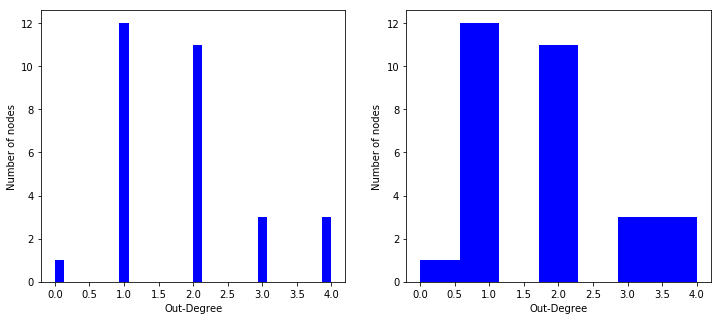

In [82]:
ds=dict(G.in_degree(G.nodes())).values()
print "In-degree sequence:"
print ds
print Counter(ds),min(ds),max(ds)

plt.figure(figsize=(12,5));
plt.subplot(121)
bins=len(ds)
plt.xlabel("Out-Degree");
hist(ds,bins=bins,color='blue'); 
# histtype='step',
plt.ylabel("Number of nodes");
plt.subplot(122)
bins=len(ds)/4
plt.xlabel("Out-Degree");
hist(ds,bins=bins,color='blue'); 
# histtype='step',
plt.ylabel("Number of nodes");

<a id='5'></a>
## 5. Adjacency Matrices

**The *adjacency matrix* of a graph *G=(V,E)* with *n* vertices is a matrix *nxn A = {Aij}* such that *Aij = 1*, whenever *(i,j) ∈ E*, while otherwise *Aij = 0*.**
* **If *G* is undirected, *A* is symmetrical. If *G* is directed, *A* can be non-symmetrical.**
* **If *G* is *weighted*, the values of *Aij* are the weights at edges *(i,j)*.**

### 5.1 Undirected Graphs

### Example 1: the adjacency matrix of an undirected Erdos-Renyi Graph

[[0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0]
 [0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0]
 [1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0]]


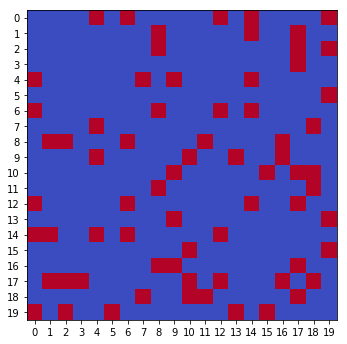

In [83]:
G = nx.erdos_renyi_graph(20,0.2)

A = nx.adjacency_matrix(G)
print(A.todense())

adjacency_matrix = nx.to_numpy_matrix(G)
fig = plt.figure(figsize=(5.7,5.7))
plt.imshow(adjacency_matrix,cmap="coolwarm",interpolation="none")
plt.xticks(list(G.nodes()));
plt.yticks(list(G.nodes()));

#### Create undirected graph from a symmetric matrix of 0s and 1s

1.8504322501034496
False
20 nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
73 edges
Is G directed? False


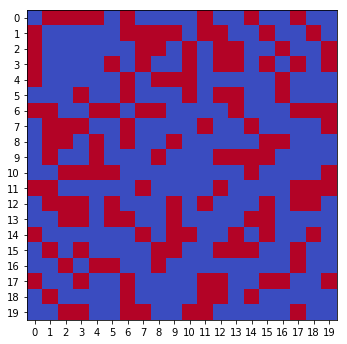

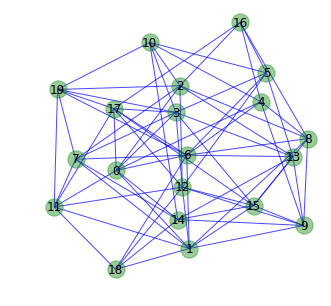

In [84]:
n=20
A1=np.random.random((n,n))
A2=A1+A1.T
A2=A2-np.diag(np.diag(A2))
r=range(n)
random.shuffle(r)
A=A2[r]
a=A.max()
print a
cut=a-0.5
A[A > cut] = 1
A[A != 1] = 0
A=A-np.diag(np.diag(A))
# print A
G=nx.from_numpy_matrix(A)
adjacency_matrix = nx.to_numpy_matrix(G)
print (A==adjacency_matrix).all()

print len(G.nodes()), 'nodes:', G.nodes() 
print len(G.edges()), 'edges' #G.edges(),
print "Is G directed?", G.is_directed()

fig = plt.figure(figsize=(5.7,5.7))
plt.imshow(adjacency_matrix,cmap="coolwarm",interpolation="none")
plt.xticks(list(G.nodes()));
plt.yticks(list(G.nodes()));

pos=graphviz_layout(G)
plt.figure(figsize=(5,5));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');

### Example 2: the adjacency matrix of an undirected Strogatz-Watts Graph

[[0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1]
 [1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0]
 [0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1]
 [0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0]
 [0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0]
 [0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0]
 [0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0]
 [0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1]
 [0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1]
 [1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 

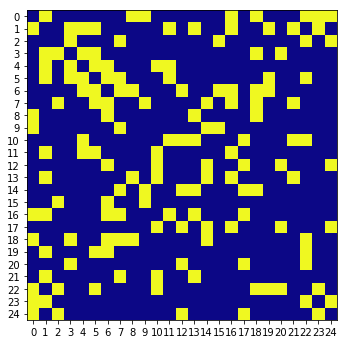

In [85]:
n=25 #no of nodes
k=6 #Each node is joined with its k nearest neighbors in a ring topology
p=0.75 #rewiring probability
# Undirected

G=nx.watts_strogatz_graph(n, k, p)

A = nx.adjacency_matrix(G)
print(A.todense())

adjacency_matrix = nx.to_numpy_matrix(G)
fig = plt.figure(figsize=(5.7,5.7))
plt.imshow(adjacency_matrix,cmap="plasma",interpolation="none")
plt.xticks(list(G.nodes()));
plt.yticks(list(G.nodes()));

1.9340170088384276
False
25 nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
76 edges
Is G directed? False


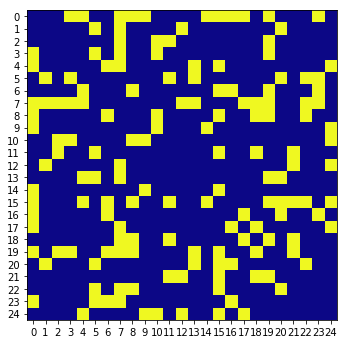

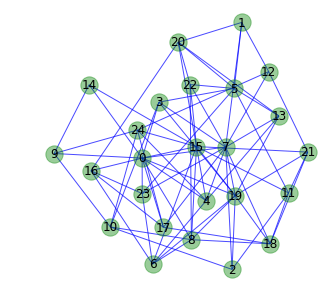

In [86]:
n=25
A1=np.random.random((n,n))
A2=A1+A1.T
A2=A2-np.diag(np.diag(A2))
r=range(n)
random.shuffle(r)
A=A2[r]
a=A.max()
print a
cut=a-0.5
A[A > cut] = 1
A[A != 1] = 0
A=A-np.diag(np.diag(A))
# print A
G=nx.from_numpy_matrix(A)
adjacency_matrix = nx.to_numpy_matrix(G)
print (A==adjacency_matrix).all()

print len(G.nodes()), 'nodes:', G.nodes() 
print len(G.edges()), 'edges' #G.edges(),
print "Is G directed?", G.is_directed()

fig = plt.figure(figsize=(5.7,5.7))
plt.imshow(adjacency_matrix,cmap="plasma",interpolation="none")
plt.xticks(list(G.nodes()));
plt.yticks(list(G.nodes()));

pos=graphviz_layout(G)
plt.figure(figsize=(5,5));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');

### Example 3: the adjacency matrix of an undirected Gnm Random Graph

[[0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1]
 [0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0]
 [1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1]
 [1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0]
 [1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1]
 [0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0]
 [1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1]
 [1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0]
 [1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1]
 [0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1]
 [0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0]
 [0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0]
 [0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1 0 1]
 [0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1]
 [1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1]
 [1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0]
 [1 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1]
 [0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 

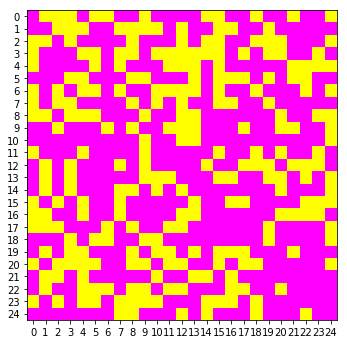

In [87]:
G=nx.gnm_random_graph(25,250,directed=True)

A = nx.adjacency_matrix(G)
print(A.todense())

adjacency_matrix = nx.to_numpy_matrix(G)
fig = plt.figure(figsize=(5.7,5.7))
plt.imshow(adjacency_matrix,cmap="spring",interpolation="none")
plt.xticks(list(G.nodes()));
plt.yticks(list(G.nodes()));

1.9267220472774307
False
35 nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
169 edges
Is G directed? False


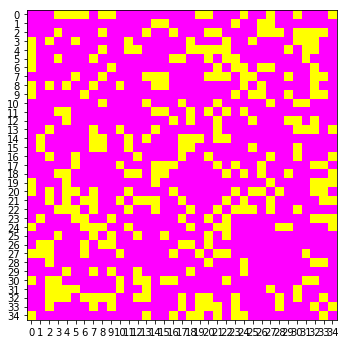

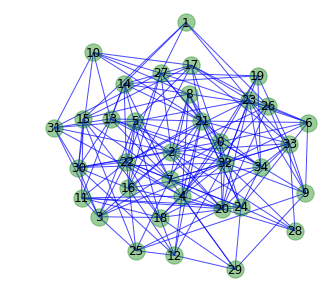

In [88]:
n=35
A1=np.random.random((n,n))
A2=A1+A1.T
A2=A2-np.diag(np.diag(A2))
r=range(n)
random.shuffle(r)
A=A2[r]
a=A.max()
print a
cut=a-0.5
A[A > cut] = 1
A[A != 1] = 0
A=A-np.diag(np.diag(A))
# print A
G=nx.from_numpy_matrix(A)
adjacency_matrix = nx.to_numpy_matrix(G)
print (A==adjacency_matrix).all()

print len(G.nodes()), 'nodes:', G.nodes() 
print len(G.edges()), 'edges' #G.edges(),
print "Is G directed?", G.is_directed()

fig = plt.figure(figsize=(5.7,5.7))
plt.imshow(adjacency_matrix,cmap="spring",interpolation="none")
plt.xticks(list(G.nodes()));
plt.yticks(list(G.nodes()));

pos=graphviz_layout(G)
plt.figure(figsize=(5,5));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');

### Example 4: the adjacency matrix of an undirected Barabasi-Albert  Graph

[[0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0]
 [1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0]
 [0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0]
 [0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0]
 [0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

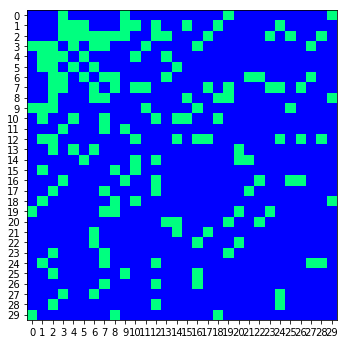

In [89]:
n=30 #no of nodes
m=3 #Number of edges to attach from a new node to existing nodes

G=nx.barabasi_albert_graph(n, m)

A = nx.adjacency_matrix(G)
print(A.todense())

adjacency_matrix = nx.to_numpy_matrix(G)
fig = plt.figure(figsize=(5.7,5.7))
plt.imshow(adjacency_matrix,cmap="winter",interpolation="none")
plt.xticks(list(G.nodes()));
plt.yticks(list(G.nodes()));

1.9466509695984144
False
40 nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
224 edges
Is G directed? False


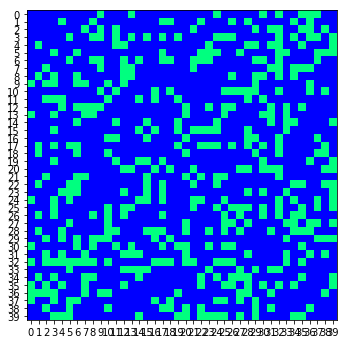

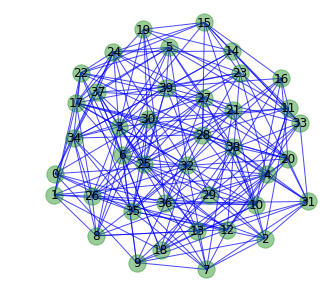

In [90]:
n=40
A1=np.random.random((n,n))
A2=A1+A1.T
A2=A2-np.diag(np.diag(A2))
r=range(n)
random.shuffle(r)
A=A2[r]
a=A.max()
print a
cut=a-0.5
A[A > cut] = 1
A[A != 1] = 0
A=A-np.diag(np.diag(A))
# print A
G=nx.from_numpy_matrix(A)
adjacency_matrix = nx.to_numpy_matrix(G)
print (A==adjacency_matrix).all()

print len(G.nodes()), 'nodes:', G.nodes() 
print len(G.edges()), 'edges' #G.edges(),
print "Is G directed?", G.is_directed()

fig = plt.figure(figsize=(5.7,5.7))
plt.imshow(adjacency_matrix,cmap="winter",interpolation="none")
plt.xticks(list(G.nodes()));
plt.yticks(list(G.nodes()));

pos=graphviz_layout(G)
plt.figure(figsize=(5,5));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');

### 5.2 Directed Graphs

### Example 1: the adjacency matrix of an directed Erdos-Renyi Graph

[[0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0]
 [0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0]
 [1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1]
 [0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0]]


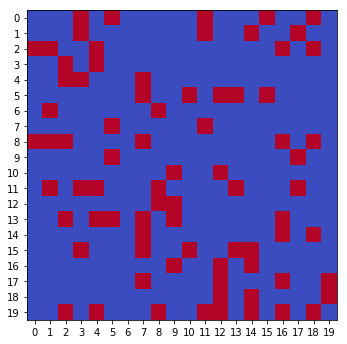

In [91]:
G = nx.erdos_renyi_graph(20,0.2,directed=True)

A = nx.adjacency_matrix(G)
print(A.todense())

adjacency_matrix = nx.to_numpy_matrix(G)
fig = plt.figure(figsize=(5.7,5.7))
plt.imshow(adjacency_matrix,cmap="coolwarm",interpolation="none")
plt.xticks(list(G.nodes()));
plt.yticks(list(G.nodes()));

#### Create directed graph from a matrix of 0s and 1s

Is G directed? True
True
20 nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
163 edges
Is G directed? True


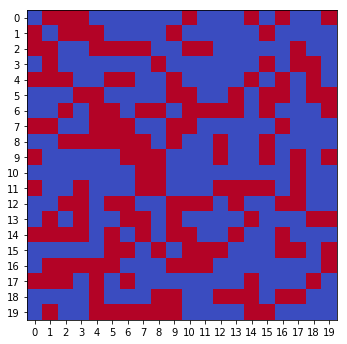

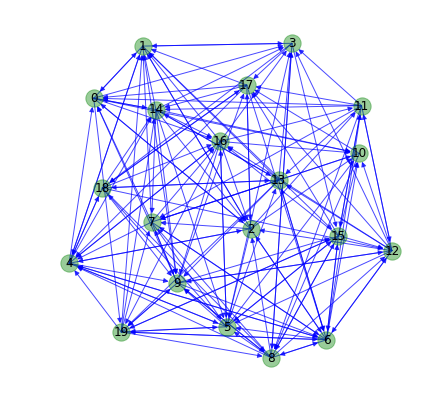

In [92]:
n=20
A1=np.random.random((n,n))
A2=A1-np.diag(np.diag(A1))
r=range(n)
random.shuffle(r)
A=A2[r]
a=A.max()
cut=a-0.5
A[A > cut] = 1
A[A != 1] = 0
A=A-np.diag(np.diag(A))
G=nx.from_numpy_matrix(A,create_using=nx.DiGraph())
print "Is G directed?", G.is_directed()
adjacency_matrix = nx.to_numpy_matrix(G)
print (A==adjacency_matrix).all()

print len(G.nodes()), 'nodes:', G.nodes() 
print len(G.edges()), 'edges' #G.edges(),
print "Is G directed?", G.is_directed()

fig = plt.figure(figsize=(5.7,5.7))
plt.imshow(adjacency_matrix,cmap="coolwarm",interpolation="none")
plt.xticks(list(G.nodes()));
plt.yticks(list(G.nodes()));

pos=graphviz_layout(G)
plt.figure(figsize=(7,7));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, arrowsize=10,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');

### Example 2: the adjacency matrix of an directed Gnm  Random Graph

[[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0]
 [1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1]
 [1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0]
 [0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0

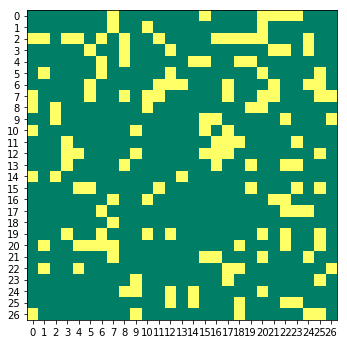

In [93]:
n=27
m=150
G=nx.gnm_random_graph(n, m, directed=True)

A = nx.adjacency_matrix(G)
print(A.todense())

adjacency_matrix = nx.to_numpy_matrix(G)
fig = plt.figure(figsize=(5.7,5.7))
plt.imshow(adjacency_matrix,cmap="summer",interpolation="none")
plt.xticks(list(G.nodes()));
plt.yticks(list(G.nodes()));


Is G directed? True
True
27 nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
327 edges
Is G directed? True


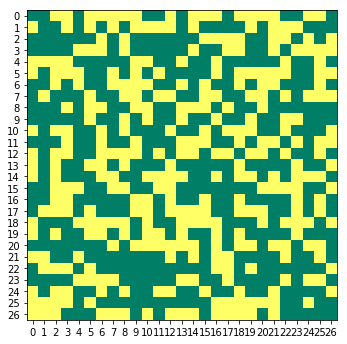

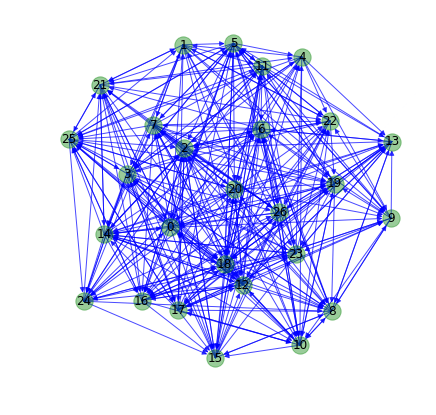

In [94]:
n=27
A1=np.random.random((n,n))
A2=A1-np.diag(np.diag(A1))
r=range(n)
random.shuffle(r)
A=A2[r]
a=A.max()
cut=a-0.5
A[A > cut] = 1
A[A != 1] = 0
A=A-np.diag(np.diag(A))
G=nx.from_numpy_matrix(A,create_using=nx.DiGraph())
print "Is G directed?", G.is_directed()
adjacency_matrix = nx.to_numpy_matrix(G)
print (A==adjacency_matrix).all()

print len(G.nodes()), 'nodes:', G.nodes() 
print len(G.edges()), 'edges' #G.edges(),
print "Is G directed?", G.is_directed()

fig = plt.figure(figsize=(5.7,5.7))
plt.imshow(adjacency_matrix,cmap="summer",interpolation="none")
plt.xticks(list(G.nodes()));
plt.yticks(list(G.nodes()));

pos=graphviz_layout(G)
plt.figure(figsize=(7,7));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, arrowsize=10,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');

### Example 3: the adjacency matrix of an directed Random Tree 

[[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1

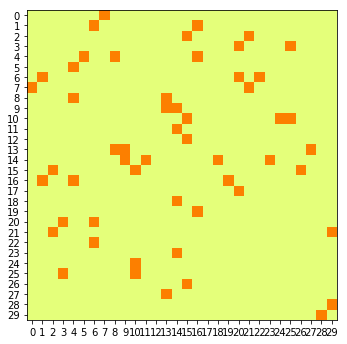

In [95]:
G=nx.random_tree(30)
E=G.edges()
Gd=nx.DiGraph()
Gd.add_edges_from(E)
G=Gd
# print len(G.edges())
e=random.sample(G.edges(),25)
eds=[]
for f in e :
    if (f[0],f[1])  in G.edges():
        eds.append((f[1],f[0]))
G.add_edges_from(eds)
# print len(G.nodes()), len(G.edges())

A = nx.adjacency_matrix(G)
print(A.todense())

adjacency_matrix = nx.to_numpy_matrix(G)
fig = plt.figure(figsize=(5.7,5.7))
plt.imshow(adjacency_matrix,cmap="Wistia",interpolation="none")
plt.xticks(list(G.nodes()));
plt.yticks(list(G.nodes()));

Is G directed? True
True
30 nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
444 edges
Is G directed? True


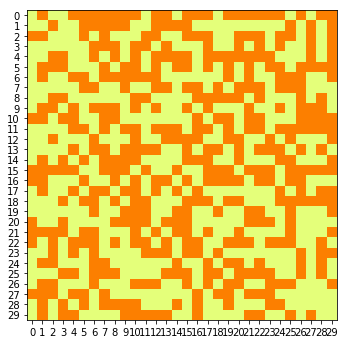

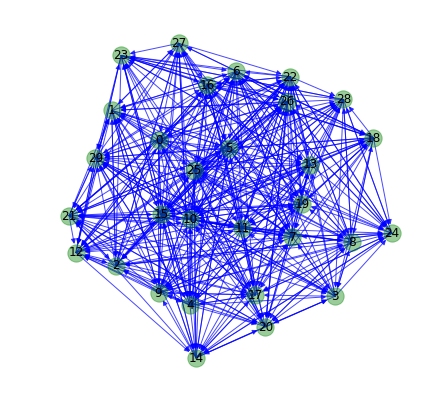

In [96]:
n=30
A1=np.random.random((n,n))
A2=A1-np.diag(np.diag(A1))
r=range(n)
random.shuffle(r)
A=A2[r]
a=A.max()
cut=a-0.5
A[A > cut] = 1
A[A != 1] = 0
A=A-np.diag(np.diag(A))
G=nx.from_numpy_matrix(A,create_using=nx.DiGraph())
print "Is G directed?", G.is_directed()
adjacency_matrix = nx.to_numpy_matrix(G)
print (A==adjacency_matrix).all()

print len(G.nodes()), 'nodes:', G.nodes() 
print len(G.edges()), 'edges' #G.edges(),
print "Is G directed?", G.is_directed()

fig = plt.figure(figsize=(5.7,5.7))
plt.imshow(adjacency_matrix,cmap="Wistia",interpolation="none")
plt.xticks(list(G.nodes()));
plt.yticks(list(G.nodes()));

pos=graphviz_layout(G)
plt.figure(figsize=(7,7));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, arrowsize=10,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');

### Example 4: the adjacency matrix of a directed modified random regular graph 


[[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1]
 [0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0]
 [0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1]
 [0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 

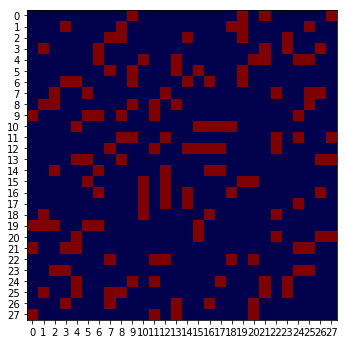

In [97]:
G=nx.random_regular_graph(4,28)

Gc=nx.complete_graph(28)
eds=random.sample(Gc.edges(),20)
G.add_edges_from(eds)

E=G.edges() 
Gd=nx.DiGraph()
Gd.add_edges_from(E)
# print nx.is_directed(Gd)

A = nx.adjacency_matrix(G)
print(A.todense())

adjacency_matrix = nx.to_numpy_matrix(G)
fig = plt.figure(figsize=(5.7,5.7))
plt.imshow(adjacency_matrix,cmap="seismic",interpolation="none")
plt.xticks(list(G.nodes()));
plt.yticks(list(G.nodes()));

Is G directed? True
True
28 nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
358 edges
Is G directed? True


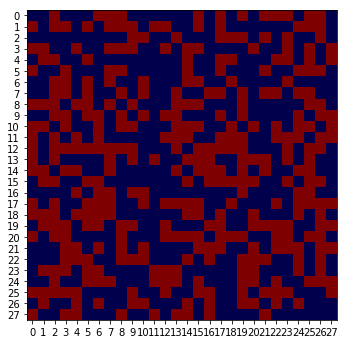

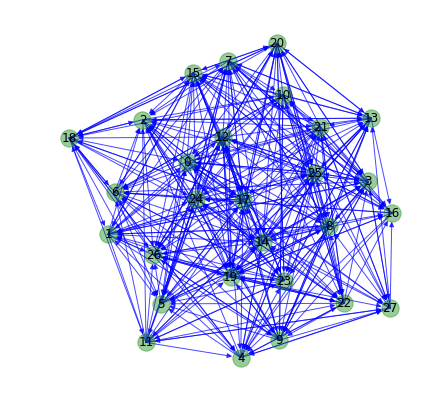

In [98]:
n=28
A1=np.random.random((n,n))
A2=A1-np.diag(np.diag(A1))
r=range(n)
random.shuffle(r)
A=A2[r]
a=A.max()
cut=a-0.5
A[A > cut] = 1
A[A != 1] = 0
A=A-np.diag(np.diag(A))
G=nx.from_numpy_matrix(A,create_using=nx.DiGraph())
print "Is G directed?", G.is_directed()
adjacency_matrix = nx.to_numpy_matrix(G)
print (A==adjacency_matrix).all()

print len(G.nodes()), 'nodes:', G.nodes() 
print len(G.edges()), 'edges' #G.edges(),
print "Is G directed?", G.is_directed()

fig = plt.figure(figsize=(5.7,5.7))
plt.imshow(adjacency_matrix,cmap="seismic",interpolation="none")
plt.xticks(list(G.nodes()));
plt.yticks(list(G.nodes()));

pos=graphviz_layout(G)
plt.figure(figsize=(7,7));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, arrowsize=10,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');

### 5.3 Weighted (Undirected) Graphs

### Example 1: the adjacency matrix of weighted Erdos-Renyi Graph

[[0 0 4 0 0 0 0 0 3 0 0 0 0 0 0 0 0 2 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 7 0 0]
 [4 0 0 0 1 0 0 9 4 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 9 8 0 0 0 0]
 [0 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2]
 [0 0 9 0 0 8 0 0 0 0 0 6 0 2 0 0 0 3 0 0]
 [3 0 4 0 0 0 2 0 0 0 0 0 0 0 7 2 0 0 9 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 8 0 9 5 0]
 [0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 6 0 1 6]
 [0 1 0 1 0 0 0 6 0 3 7 0 0 0 0 1 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 9 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 9 0 0 0 0 7 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 8 0 0 0 0 2 8 0 1 9 0 1 0 5 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 6 0 0 0 0 5 0 0 0 0]
 [2 7 0 0 8 0 0 3 0 9 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 3 0 0 9 5 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 6 0 0 0 0 0 0 0 0 0]]


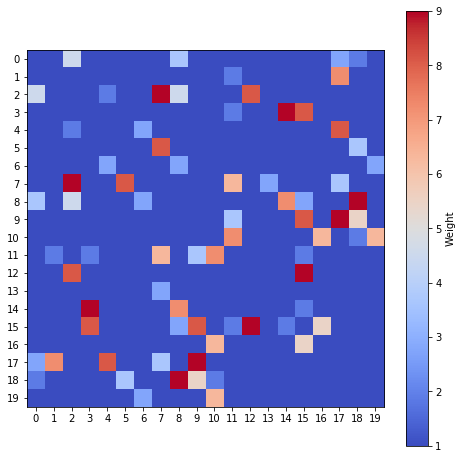

In [99]:
G = nx.erdos_renyi_graph(20,0.2)

weight={}
maxw=10
for edge in G.edges():
    ed=edge[0]
    de=edge[1]
    G[ed][de]['weight']=random.randrange(1,maxw)
    weight[(ed,de)]=G[ed][de]['weight']
weight_list = [ weight[e] for e in G.edges() ]

A = nx.adjacency_matrix(G)
print(A.todense())

adjacency_matrix = nx.to_numpy_matrix(G)
fig = plt.figure(figsize=(8,8))
cmap=plt.cm.coolwarm #Greens
edge_color=weight_list
vmin = min(edge_color) 
vmax = max(edge_color) 
plt.imshow(adjacency_matrix,cmap=cmap,interpolation="none")
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label="Weight") #, orientation='horizontal')
plt.xticks(list(G.nodes()));
plt.yticks(list(G.nodes()));

#### Create weighted graph from a matrix of integers

[[ 0  7  7  0  9  5 11  9 15  3  0  5 13 13 10  5 17  7  9 13]
 [ 8  0 13  7  3  4 14 12  9 13 15 10 17 11 18 12  9  0  3 11]
 [ 6 11  0 13  6  3 16  7  6  6  8 13 12  0 14  9 14  9 10  7]
 [10  9  9  0 15  1  9 11 11 15  8 13  8 14 17 18  0  7  6  4]
 [ 9 14 16 11  0 10  0  7 15  9 14 11  6 16  4  1  9 10 13 12]
 [ 8  4 10  5  6  0 10 10 17  7  5 17  4  3  3 12  1  7 15 14]
 [ 8 10  4  5 14 17  0  7 12  7 10  0  9 13 12 17 13  8 10  5]
 [ 8 18  7 10  3  3  4  0  9 13  2 12 17 14  0 14 17 11 12 11]
 [ 9 13  9  3  2  7  9  8  0  0 12  7  9  6 13 17 15  6  8 18]
 [ 5  9  8 15  6 17 15  7  0  0 14 12 13  6  9  9 11  8 10 15]
 [ 0  8  4  8  5  8  9 15  5  9  0  8  7  6  8 13 10 15  6 16]
 [ 5  3  8  9  0  6  6 16  6  2  7  0  5  6  3 11 15 10  9 13]
 [16 11 15 13 13 14 12  5 15 18  8  5  0  7 11 13  4 17 10  0]
 [ 7 17  4 13  5  4  6 16 13  9 13  9  0  0 17 10  8  6  9 10]
 [15 12  1  9 16 10  7  0  7  8  3  7 16  7  0  4 11  0  7  5]
 [ 6 15  6  0  7  5 14  3 14 12  0 10 13  8  2  0  8 13

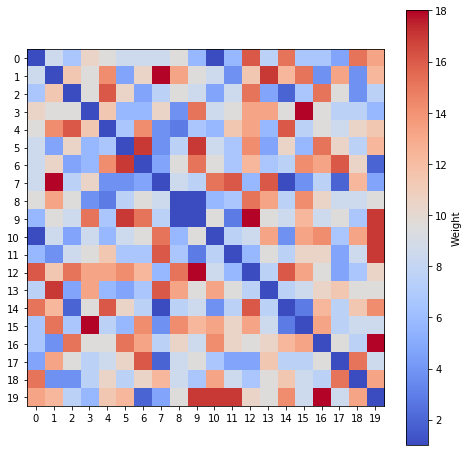

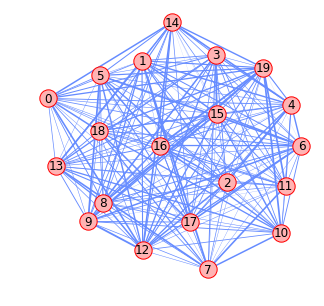

In [100]:
n=20
A1=np.random.random((n,n))
A2=A1+A1.T
A2=A2-np.diag(np.diag(A2))
r=range(n)
random.shuffle(r)
A=A2[r]
# a=A.max()
# print a
# cut=a-0.5
# A[A > cut] = 1
# A[A != 1] = 0
A=A-np.diag(np.diag(A))
A=10*A
A=A.astype(int)
print A

G=nx.from_numpy_matrix(A)
adjacency_matrix = nx.to_numpy_matrix(G)
print (A==adjacency_matrix).all()

print len(G.nodes()), 'nodes:', G.nodes() 
print len(G.edges()), 'edges' #G.edges(),
print "Is G weighted?", nx.is_weighted(G)

# print G.edges(data=True)
weight_list = [ e[2]['weight'] for e in G.edges(data=True) ]

fig = plt.figure(figsize=(8,8))
cmap=plt.cm.coolwarm #Greens
edge_color=weight_list
vmin = min(edge_color) 
vmax = max(edge_color) 
plt.imshow(adjacency_matrix,cmap=cmap,interpolation="none")
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label="Weight") #, orientation='horizontal')
plt.xticks(list(G.nodes()));
plt.yticks(list(G.nodes()));

# w_edges=[(x,y,z) for (x,y),z in weight.items()]
# G = nx.Graph()
# # G = nx.DiGraph()
# G.add_weighted_edges_from(w_edges)

elabels={}
elabels = nx.get_edge_attributes(G,'weight')
edge_width=[G[u][v]['weight'] for u,v in G.edges()] 
edge_width=[0.1*w for w in edge_width]

figsize=(5,5)
pos=graphviz_layout(G) 
node_color="#ffb3b3"
node_border_color="r"
edge_color="#668cff"
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color,width=edge_width)
nx.draw_networkx_labels(G, pos)
# nx.draw_networkx_edge_labels(G,pos,edge_labels=elabels);
plt.axis('off');

# pos=graphviz_layout(G)
# plt.figure(figsize=(5,5));
# nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
# nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
# nx.draw_networkx_labels(G, pos)
# plt.axis('off');

### Example 2: the adjacency matrix of weighted Barabasi-Albert Graph

[[0 0 0 0 3 4 0 0 0 5 0 0 6 0 1 0 0 0 5 0 0 0 0 0 0 0 7 0 0 0]
 [0 0 0 0 5 7 0 0 9 4 1 0 0 1 0 3 0 0 0 0 0 0 0 0 0 0 0 1 8 0]
 [0 0 0 0 4 0 9 9 0 0 0 0 0 0 0 0 0 9 0 0 4 0 7 0 0 8 0 0 0 5]
 [0 0 0 0 6 9 9 0 7 0 0 5 0 6 0 6 0 0 0 0 6 7 6 0 2 0 5 2 0 0]
 [3 5 4 6 0 7 2 2 0 5 0 0 8 0 2 1 5 4 0 8 2 2 0 0 5 1 0 0 6 0]
 [4 7 0 9 7 0 2 3 4 1 0 5 0 0 0 0 0 9 0 5 0 0 5 9 0 8 0 0 0 0]
 [0 0 9 9 2 2 0 6 9 0 8 0 0 0 0 0 4 0 4 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 9 0 2 3 6 0 0 0 4 2 7 0 0 0 0 0 6 0 0 0 0 0 7 0 0 0 0 0]
 [0 9 0 7 0 4 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [5 4 0 0 5 1 0 0 0 0 6 8 0 9 6 0 0 0 9 4 0 8 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 8 4 0 6 0 0 0 0 0 3 3 0 0 0 0 6 0 0 0 0 0 9 0 7]
 [0 0 0 5 0 5 0 2 0 8 0 0 6 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [6 0 0 0 8 0 0 7 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 6 0 0 0 0 0 9 0 6 0 0 1 0 0 0 0 0 6 0 0 6 0 0 0 0 0 0]
 [1 0 0 0 2 0 0 0 0 6 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 6 1 0 0 0 0 0 3 0 0 0 0 0 5 0 0 0 0 0 0 3 0 0 0

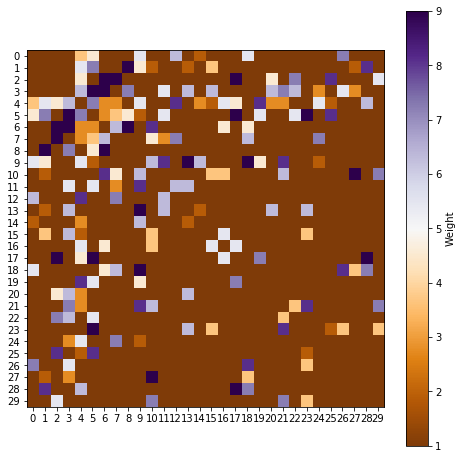

In [101]:
n=30 #no of nodes
m=4 #Number of edges to attach from a new node to existing nodes
# Undirected

G=nx.barabasi_albert_graph(n, m)

weight={}
maxw=10
for edge in G.edges():
    ed=edge[0]
    de=edge[1]
    G[ed][de]['weight']=random.randrange(1,maxw)
    weight[(ed,de)]=G[ed][de]['weight']
weight_list = [ weight[e] for e in G.edges() ]

A = nx.adjacency_matrix(G)
print(A.todense())

adjacency_matrix = nx.to_numpy_matrix(G)
fig = plt.figure(figsize=(8,8))
cmap=plt.cm.PuOr #Greens
edge_color=weight_list
vmin = min(edge_color) 
vmax = max(edge_color) 
plt.imshow(adjacency_matrix,cmap=cmap,interpolation="none")
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label="Weight") #, orientation='horizontal')
plt.xticks(list(G.nodes()));
plt.yticks(list(G.nodes()));

[[ 0 10 10  8 11 17  9 16 14  7 16 13 14  7 10 16  5 10 15  8 15  4  0 11
  16 13  3  7  5 12]
 [12  0  9  8 14 12  6  3 11  8 10  2  5 12  6  2  4 11 13 14 16 15 13 16
   9  0 14 12 16  8]
 [10  7  0 14 10 15 14 15 15 10 17  9  5  6  0 10  8 17 11  9  9  5 10 13
   8  6 11 13  9 14]
 [17  9  6  0  9  9  8 13  3  9 11  9  6  9 11  6  7 16  0  7 13  5 15  3
   3 13 10  8 11 10]
 [13 11 11  4  0 11 14  8  8 15  0 10  1  7 17  9 13  5 11  8 12  9 16 14
   7 10 13 18  4 10]
 [ 8 11  9  2 12  0 10 11 10  0 15 11 13 15 10 12  9 13  9  6 13 12  7  8
  14  8  3  7 11  5]
 [ 8 13 16  2  9 13  0 12  0 10  8 10  9  3 15 13  7  9  3 11 15  8 14 16
  12 11 12  5  5  5]
 [12 12  6  9 13 11 11  0  5 11  4  7 12  9  9 15 15 11 11 13  5  6  5 12
  11 16 14  7  0  9]
 [ 6  8  4 17 10 11  4 11  0  8 14  8  5 14 13 10  2 16  3  9 10 14 11  0
  13 16 11  8 12 11]
 [ 4  8  5  8 15  0  5  6 13  0 11  5 13  4 15 14 12 17  9 13  9  4 17 11
  10 12 13  6 11 15]
 [ 6  7 13  8  6 13  8  8 12  3  0 15  5  8 11  9 

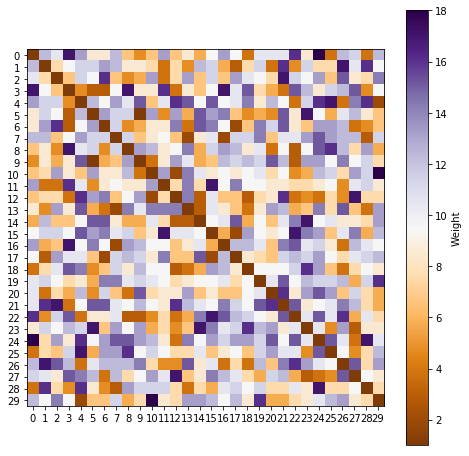

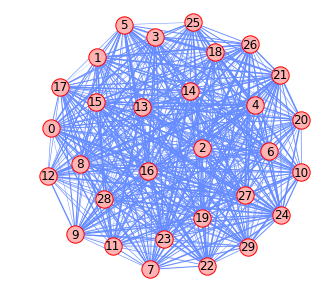

In [102]:
n=30
A1=np.random.random((n,n))
A2=A1+A1.T
A2=A2-np.diag(np.diag(A2))
r=range(n)
random.shuffle(r)
A=A2[r]
# a=A.max()
# print a
# cut=a-0.5
# A[A > cut] = 1
# A[A != 1] = 0
A=A-np.diag(np.diag(A))
A=10*A
A=A.astype(int)
print A

G=nx.from_numpy_matrix(A)
adjacency_matrix = nx.to_numpy_matrix(G)
print (A==adjacency_matrix).all()

print len(G.nodes()), 'nodes:', G.nodes() 
print len(G.edges()), 'edges' #G.edges(),
print "Is G weighted?", nx.is_weighted(G)

# print G.edges(data=True)
weight_list = [ e[2]['weight'] for e in G.edges(data=True) ]

fig = plt.figure(figsize=(8,8))
cmap=plt.cm.PuOr #Greens
edge_color=weight_list
vmin = min(edge_color) 
vmax = max(edge_color) 
plt.imshow(adjacency_matrix,cmap=cmap,interpolation="none")
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label="Weight") #, orientation='horizontal')
plt.xticks(list(G.nodes()));
plt.yticks(list(G.nodes()));

# w_edges=[(x,y,z) for (x,y),z in weight.items()]
# G = nx.Graph()
# # G = nx.DiGraph()
# G.add_weighted_edges_from(w_edges)

elabels={}
elabels = nx.get_edge_attributes(G,'weight')
edge_width=[G[u][v]['weight'] for u,v in G.edges()] 
edge_width=[0.1*w for w in edge_width]

figsize=(5,5)
pos=graphviz_layout(G) 
node_color="#ffb3b3"
node_border_color="r"
edge_color="#668cff"
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color,width=edge_width)
nx.draw_networkx_labels(G, pos)
# nx.draw_networkx_edge_labels(G,pos,edge_labels=elabels);
plt.axis('off');

# pos=graphviz_layout(G)
# plt.figure(figsize=(5,5));
# nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
# nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
# nx.draw_networkx_labels(G, pos)
# plt.axis('off');

### Example 3: the adjacency matrix of weighted Gnm Random Graph

[[0 0 8 0 0 4 0 0 0 0 2 0 0 0 0 0 0 9 0 0 0 0 0 0 3]
 [0 0 0 0 0 6 0 6 2 9 2 0 0 0 0 0 0 6 0 0 8 0 0 0 0]
 [8 0 0 0 0 0 0 8 0 0 0 0 7 0 9 0 0 5 0 0 0 0 2 0 4]
 [0 0 0 0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 9 0 0 0 0 0 0 0 0 1 6 0 0]
 [4 6 0 0 0 0 8 0 9 0 0 0 7 0 0 0 0 0 7 0 0 0 0 5 0]
 [0 0 0 0 0 8 0 0 0 0 3 9 6 7 0 0 0 0 0 0 0 0 4 0 0]
 [0 6 8 3 0 0 0 0 0 2 1 2 0 0 0 6 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 9 0 0 0 7 0 0 0 9 0 0 0 0 0 0 0 0 0 0 0]
 [0 9 0 0 0 0 0 2 7 0 0 7 5 0 1 0 0 0 0 0 8 0 0 8 0]
 [2 2 0 2 0 0 3 1 0 0 0 4 0 7 0 0 0 0 5 6 0 0 0 0 0]
 [0 0 0 0 0 0 9 2 0 7 4 0 0 5 6 0 0 9 0 0 0 0 0 1 7]
 [0 0 7 0 9 7 6 0 0 5 0 0 0 0 0 0 6 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 7 0 9 0 7 5 0 0 9 0 0 9 0 0 8 0 0 0 0]
 [0 0 9 0 0 0 0 0 0 1 0 6 0 9 0 0 7 3 0 0 5 0 0 8 0]
 [0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 9 0 1 0 0 8 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 6 0 7 0 0 0 0 2 9 0 0 0 1]
 [9 6 5 0 0 0 0 0 0 0 0 9 0 9 3 9 0 0 0 7 0 3 0 6 2]
 [0 0 0 0 0 7 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 

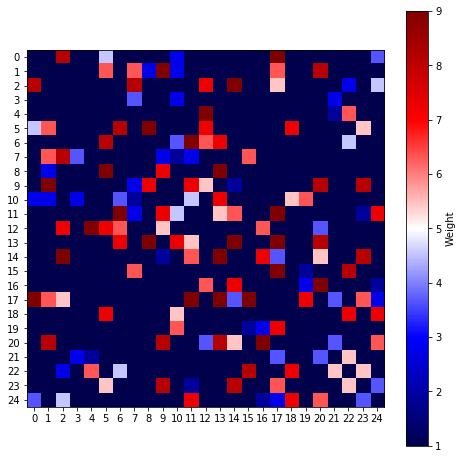

In [103]:
G=nx.gnm_random_graph(25,80)

weight={}
maxw=10
for edge in G.edges():
    ed=edge[0]
    de=edge[1]
    G[ed][de]['weight']=random.randrange(1,maxw)
    weight[(ed,de)]=G[ed][de]['weight']
weight_list = [ weight[e] for e in G.edges() ]

A = nx.adjacency_matrix(G)
print(A.todense())

adjacency_matrix = nx.to_numpy_matrix(G)
fig = plt.figure(figsize=(8,8))
cmap=plt.cm.seismic #Greens
edge_color=weight_list
vmin = min(edge_color) 
vmax = max(edge_color) 
plt.imshow(adjacency_matrix,cmap=cmap,interpolation="none")
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label="Weight") #, orientation='horizontal')
plt.xticks(list(G.nodes()));
plt.yticks(list(G.nodes()));

[[ 0  8  8 11 17  6  5  3 10 12  9  7  9  9 12 16 11  6 13 11  6 13  0 14
   5]
 [13  0 10 15  6  1  8  6 13 10  6 13  9 11 17  1  6 16  6  9  5 14 14  0
   9]
 [14  7  0  7 11 11 12 14  0  9 12 11  3 11 12 12 13  8 14  7 13  9 10 13
   4]
 [13  9 10  0 12  5  9 18 13  5  8 12  5 15 12 13  0  8  8 15 11 16 11  6
  16]
 [ 3 16  8  2  0 10  6  5  9  3 14 11 15 13  5 17 16 14 12  2 10  0 13 14
   0]
 [ 0  8  1  8 13  0 11 10 14 12 16 10  8  4 10 14 13  4  3  9  5  3  9 13
   6]
 [ 3  9  7 13 11  8  0 12 14  6 11 14  7 14  9 11  8  6  0  8  3 12 13  6
   5]
 [ 5  6 15  5 10  7 14  0 13 14  7  9 11 13  8 16 11  8  3 13  0 10  6  5
   9]
 [ 6 15  8 16  5 15  9 16  0  8 15 13 15  6  3 11 16 10  5 11  9  0  5  9
   0]
 [16  7 13  8 11 16 19 13 12  0  0 16 14 14  5  4  8 10 11  5  7 14  9  6
  15]
 [ 9  2  9 10 13  8  9 13  7 16  0 13  6 10  9 15 15  2  8  0 13  2 11  9
  11]
 [ 4  3  9  9  2  8 10 10  8 14 10  0  3  2  9  7  8  0  6  2  8 14  6 16
  10]
 [ 8 11 14  9 13  7  8  0  3  2 14  6  0

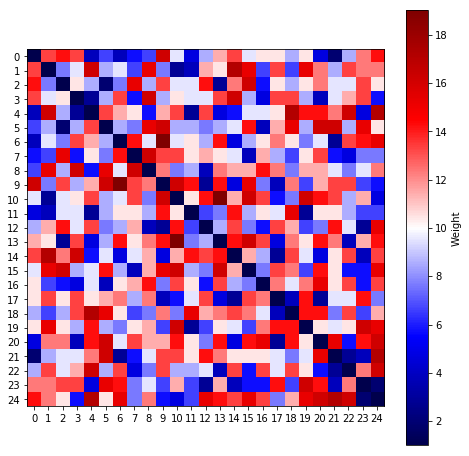

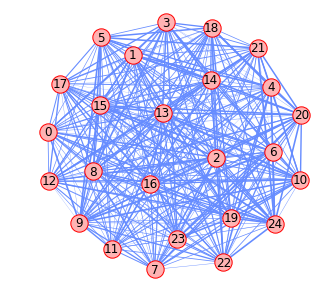

In [104]:
n=25
A1=np.random.random((n,n))
A2=A1+A1.T
A2=A2-np.diag(np.diag(A2))
r=range(n)
random.shuffle(r)
A=A2[r]
# a=A.max()
# print a
# cut=a-0.5
# A[A > cut] = 1
# A[A != 1] = 0
A=A-np.diag(np.diag(A))
A=10*A
A=A.astype(int)
print A

G=nx.from_numpy_matrix(A)
adjacency_matrix = nx.to_numpy_matrix(G)
print (A==adjacency_matrix).all()

print len(G.nodes()), 'nodes:', G.nodes() 
print len(G.edges()), 'edges' #G.edges(),
print "Is G weighted?", nx.is_weighted(G)

# print G.edges(data=True)
weight_list = [ e[2]['weight'] for e in G.edges(data=True) ]

fig = plt.figure(figsize=(8,8))
cmap=plt.cm.seismic #Greens
edge_color=weight_list
vmin = min(edge_color) 
vmax = max(edge_color) 
plt.imshow(adjacency_matrix,cmap=cmap,interpolation="none")
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label="Weight") #, orientation='horizontal')
plt.xticks(list(G.nodes()));
plt.yticks(list(G.nodes()));

# w_edges=[(x,y,z) for (x,y),z in weight.items()]
# G = nx.Graph()
# # G = nx.DiGraph()
# G.add_weighted_edges_from(w_edges)

elabels={}
elabels = nx.get_edge_attributes(G,'weight')
edge_width=[G[u][v]['weight'] for u,v in G.edges()] 
edge_width=[0.1*w for w in edge_width]

figsize=(5,5)
pos=graphviz_layout(G) 
node_color="#ffb3b3"
node_border_color="r"
edge_color="#668cff"
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color,width=edge_width)
nx.draw_networkx_labels(G, pos)
# nx.draw_networkx_edge_labels(G,pos,edge_labels=elabels);
plt.axis('off');

# pos=graphviz_layout(G)
# plt.figure(figsize=(5,5));
# nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
# nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
# nx.draw_networkx_labels(G, pos)
# plt.axis('off');

### Example 4: the adjacency matrix of weighted Strogatz-Watts Graph

[[ 0  9  0  0  0  0  0  0  0  0  0  0  0 13  0  0  0  0  0  0 16  0  0  0
  14  0  0  0]
 [ 9  0  0  0 10  9  3 19  0  0  7  0  0  0  0  0  0  0  0  0 15  0  0  0
   0  0  7 10]
 [ 0  0  0 17  0  0  0  0  0  9  0  0 15  0  0  0  0  0  5  0 18  0  0  0
   0  0  0  0]
 [ 0  0 17  0  0  5 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 10  0
   0  0  0  0]
 [ 0 10  0  0  0  0 16  0  0  0  0  0  0  0  1  0  0 17  0  0  0  0  0  5
   0  0  0 10]
 [ 0  9  0  5  0  0  0  0  0  0  0  7  7  0  0  0  0  0  8  0 14  0  0  0
   0 16  0  0]
 [ 0  3  0 18 16  0  0  0  0  0  0  4  0  0  0  0  7  0  0 10  0  0  0  0
   0  0  0 18]
 [ 0 19  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0 14  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 10  0  0  0  0  0 15 17  0  0  0  0  0  0  0
   8  0  0  0]
 [ 0  0  9  0  0  0  0  2 10  0  0  8  0  0 15  0  0  0  0  0  0  0  0  0
   0 13  0  0]
 [ 0  7  0  0  0  0  0  0  0  0  0  4  2  0  9  0  0  0  0  0  0  0  0  0
  13  0  0  0]
 [ 0  0  0  0  0  7  

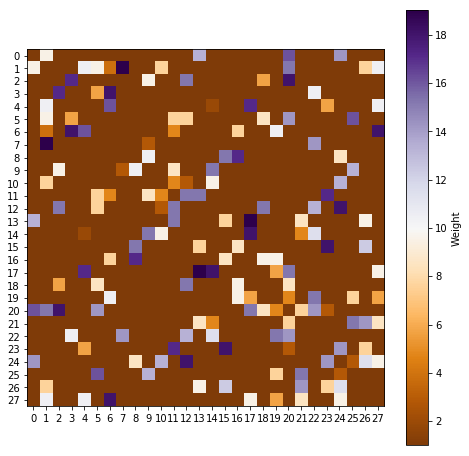

In [105]:
n=28 #no of nodes
k=6 #Each node is joined with its k nearest neighbors in a ring topology
p=0.75 #rewiring probability
# Undirected

G=nx.watts_strogatz_graph(n, k, p)

weight={}
maxw=20
for edge in G.edges():
    ed=edge[0]
    de=edge[1]
    G[ed][de]['weight']=random.randrange(1,maxw)
    weight[(ed,de)]=G[ed][de]['weight']
weight_list = [ weight[e] for e in G.edges() ]

A = nx.adjacency_matrix(G)
print(A.todense())

adjacency_matrix = nx.to_numpy_matrix(G)
fig = plt.figure(figsize=(8,8))
cmap=plt.cm.PuOr #Greens
edge_color=weight_list
vmin = min(edge_color) 
vmax = max(edge_color) 
plt.imshow(adjacency_matrix,cmap=cmap,interpolation="none")
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label="Weight") #, orientation='horizontal')
plt.xticks(list(G.nodes()));
plt.yticks(list(G.nodes()));


[[ 0 11  7 16  9  8 10  7 14  9 12 14  6 15  9  0 12 13 16 10 15  2  9 11
  17  4 18  5]
 [17  0 18 14 18  6  3 13  2  6 14 11 16 14  9 18 11  9  7  6 13  7 13  5
   8  7  0 15]
 [13 11  0  2  3 11  3 11 15 12 11 12 15 13  0  9 11 14  9  0  8 11  9 12
   4 11  9  7]
 [ 2  9  3  0  7 12  1  6 12  4 15  0 12  2 12 14  4 19 10  6 11 15  6 17
  15  8 11 13]
 [ 7 12 10 12  0  7 10  5  7  5 19  6 15 14  9  9  4  5 13  7  9 13  0 15
  18  5 13 11]
 [ 7  0 14  7 10  0 15  9  9  0  7  9  8  7 11 11  4 13 18  2  7 10 12 12
   9  6  9  7]
 [14  2  7  7 10 17  0 15 16 15  8  6  8 12  0 10  8  3  5  0  9 14  7 11
   8  9  6 12]
 [10  0  4 10  8 13 13  0 11  0 12  4 10 17 12  9 11  6  9 15 12 10  5 12
   5 13  6 10]
 [ 7 13  2  4  5  9 11  3  0  6  6 19  6 10 14 13 12  0  7  3  4 15  5  7
  17  2  9  4]
 [ 8  9 19 17 17 12  9  5  0  0 10 12 10  9 15 14  8 17  2 16 14 10  7 11
   5  5  2  8]
 [11 14  0  8 10 10 15  7 19  4  0  3  9  6 13  7 14  2 13  7  6  7 10 10
  13 12 18 16]
 [17  4 14 14  8 15 1

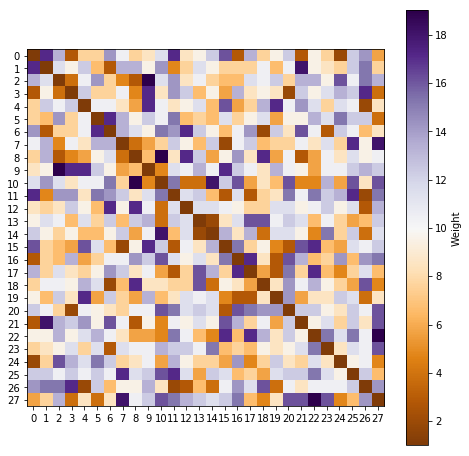

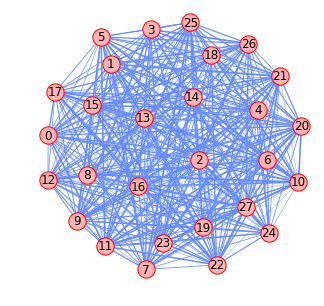

In [106]:
n=28
A1=np.random.random((n,n))
A2=A1+A1.T
A2=A2-np.diag(np.diag(A2))
r=range(n)
random.shuffle(r)
A=A2[r]
# a=A.max()
# print a
# cut=a-0.5
# A[A > cut] = 1
# A[A != 1] = 0
A=A-np.diag(np.diag(A))
A=10*A
A=A.astype(int)
print A

G=nx.from_numpy_matrix(A)
adjacency_matrix = nx.to_numpy_matrix(G)
print (A==adjacency_matrix).all()

print len(G.nodes()), 'nodes:', G.nodes() 
print len(G.edges()), 'edges' #G.edges(),
print "Is G weighted?", nx.is_weighted(G)

# print G.edges(data=True)
weight_list = [ e[2]['weight'] for e in G.edges(data=True) ]

fig = plt.figure(figsize=(8,8))
cmap=plt.cm.PuOr #Greens
edge_color=weight_list
vmin = min(edge_color) 
vmax = max(edge_color) 
plt.imshow(adjacency_matrix,cmap=cmap,interpolation="none")
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label="Weight") #, orientation='horizontal')
plt.xticks(list(G.nodes()));
plt.yticks(list(G.nodes()));

# w_edges=[(x,y,z) for (x,y),z in weight.items()]
# G = nx.Graph()
# # G = nx.DiGraph()
# G.add_weighted_edges_from(w_edges)

elabels={}
elabels = nx.get_edge_attributes(G,'weight')
edge_width=[G[u][v]['weight'] for u,v in G.edges()] 
edge_width=[0.1*w for w in edge_width]

figsize=(5,5)
pos=graphviz_layout(G) 
node_color="#ffb3b3"
node_border_color="r"
edge_color="#668cff"
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color,width=edge_width)
nx.draw_networkx_labels(G, pos)
# nx.draw_networkx_edge_labels(G,pos,edge_labels=elabels);
plt.axis('off');

# pos=graphviz_layout(G)
# plt.figure(figsize=(5,5));
# nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
# nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
# nx.draw_networkx_labels(G, pos)
# plt.axis('off');